NOTA: La práctica la he hecho con Google Collab porque va como un tiro comparado con mi ordenador. En prncipio el formato es el mismo que Jupyter pero si la visualización va mal lo paso a JN en un momento.

# EJERCICIO 1

EXPLICACIONES DE LAS VARIABLES

seqnbr case number (the numbers 1 to 654)

subjid subject identification number (unique for each different child)

age subject age at time of measurement (years)

fev measured FEV (forced expiratory volume using liters per second)

height subject height at time of measurement (inches)

sex subject sex (1 = male, 2 = female)

smoke smoking habits (1 = yes, 2 = no)

###1 - Reporte descriptivo de los datos. Dimensiones del dataset, número de variables continuas y categóricas. Distribuciones. Comentarios generales.

In [ ]:
#importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Acceso a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leer el archivo CSV y guardarlo como un DataFrame
df = pd.read_csv('/content/drive/MyDrive/Documentos/MASTER UCM/Mínería de datos - Guillermo/Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428/Datos/FEV_data.csv')
# Información del dataset
df.info()
print()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB



seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

In [ ]:
df

seqnbr  subjid  age    fev  height  sex  smoke
0         1     301    9  1.708    57.0    2      2
1         2     451    8  1.724    67.5    2      2
2         3     501    7  1.720    54.5    2      2
3         4     642    9  1.558    53.0    1      2
4         5     901    9  1.895    57.0    1      2
..      ...     ...  ...    ...     ...  ...    ...
649     650   73041   16  4.270    67.0    1      1
650     651   73042   15  3.727    68.0    1      1
651     652   73751   18  2.853    60.0    2      2
652     653   75852   16  2.795    63.0    2      1
653     654   77151   15  3.211    66.5    2      2

[654 rows x 7 columns]

Dataset ya trabajado en el que todas las variables están ya en valor numérico, sin missings.

Respecto a las variables:

*Sex* y *Smoke* son variables binarias, mientras que el resto son numéricas.
La variable dependiente fev tiene 575 registros diferentes.

Pasamos las variables object a categóricas:

In [ ]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(df.loc[:,df.nunique() <= 10]);
to_factor

['sex', 'smoke']

In [ ]:
# Podemos cambiar el tipo de todas ellas a factor de una vez
df[to_factor] = df[to_factor].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seqnbr  654 non-null    int64   
 1   subjid  654 non-null    int64   
 2   age     654 non-null    int64   
 3   fev     654 non-null    float64 
 4   height  654 non-null    float64 
 5   sex     654 non-null    category
 6   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 27.2 KB


In [ ]:
# Dimensiones del dataset
print("Dimensiones del dataset:")
print("Número de filas y columnas", df.shape)
print()

# Número de variables continuas y categóricas
variables_continuas = df.select_dtypes(include="float64").columns
variables_categoricas = df.select_dtypes(include=["object","int64"]).columns
print("Variables continuas:", len(variables_continuas))
print("Variables categóricas:", len(variables_categoricas))

# Distribuciones de las variables
print("Descripción estadística de las variables:")
print(df.describe())

Dimensiones del dataset:
Número de filas y columnas (654, 7)

Variables continuas: 2
Variables categóricas: 3
Descripción estadística de las variables:
          seqnbr        subjid         age         fev      height
count  654.00000    654.000000  654.000000  654.000000  654.000000
mean   327.50000  37169.571865    9.931193    2.636780   61.143578
std    188.93782  23690.860350    2.953935    0.867059    5.703513
min      1.00000    201.000000    3.000000    0.791000   46.000000
25%    164.25000  15811.000000    8.000000    1.981000   57.000000
50%    327.50000  36071.000000   10.000000    2.547500   61.500000
75%    490.75000  53638.500000   12.000000    3.118500   65.500000
max    654.00000  90001.000000   19.000000    5.793000   74.000000


In [ ]:
cat_cols= df.select_dtypes(include=['category']).columns
num_cols = df.select_dtypes(exclude=['category']).columns

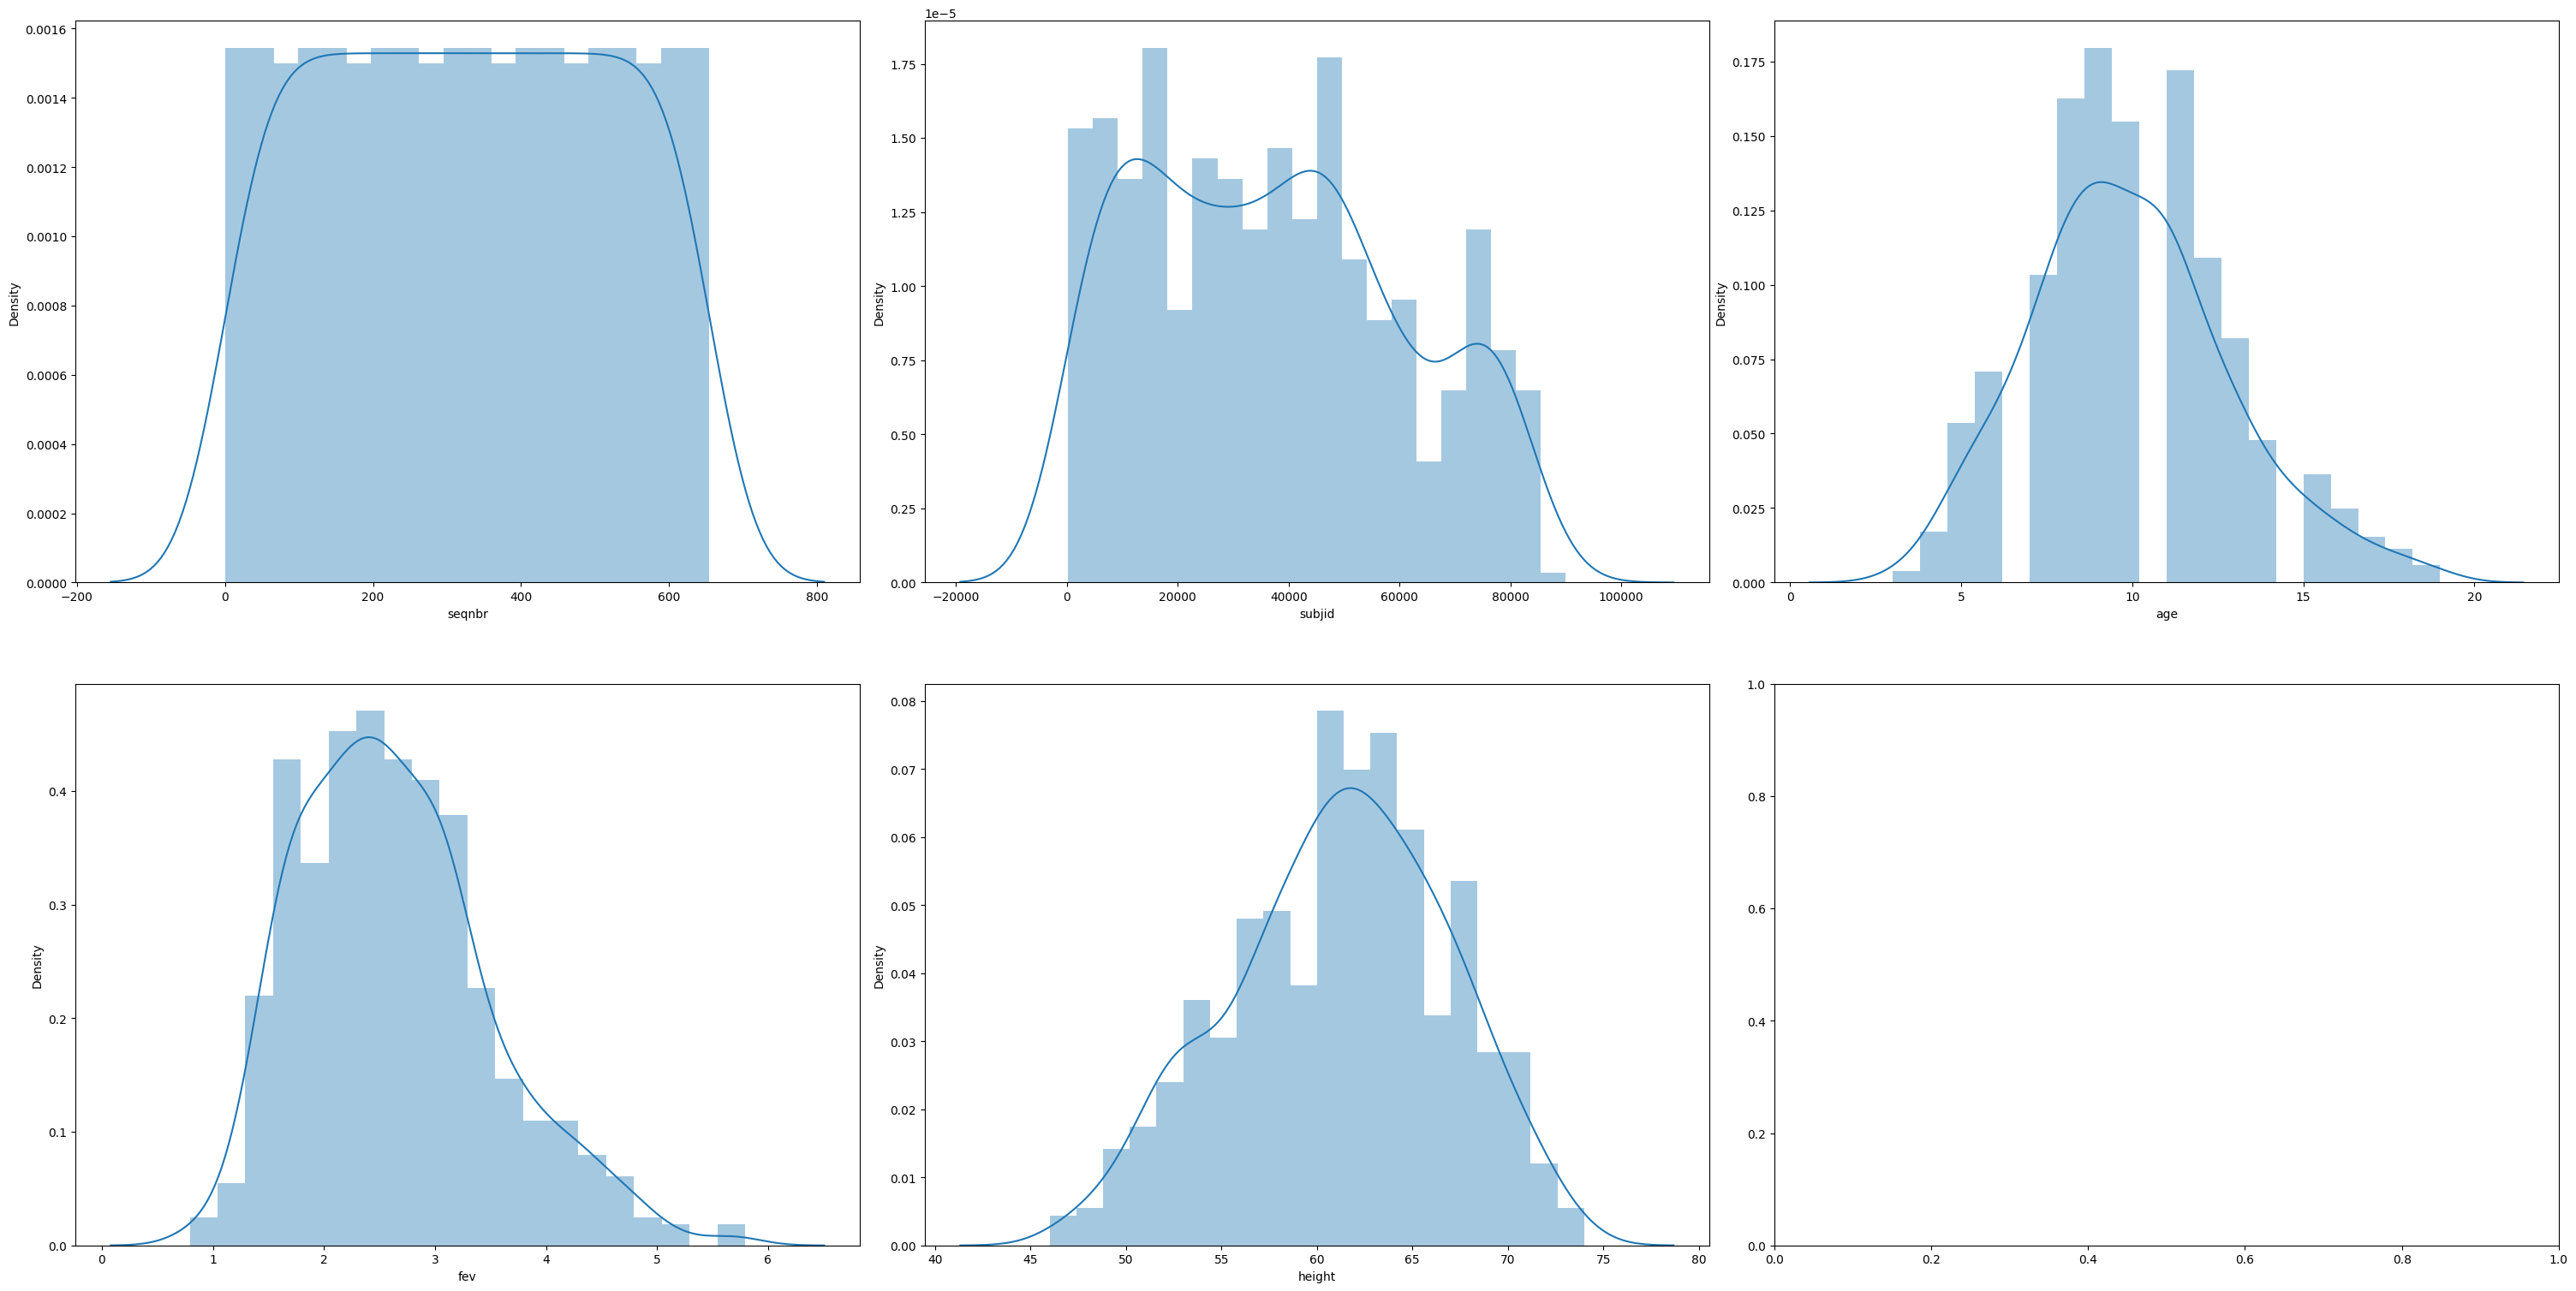

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Variables numéricas
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 15))
axs = axs.flatten()

index = 0
for k,v in df[num_cols].items():
    if  (k == 'permanencia'):
        sns.countplot(v, ax=axs[index])
    else:
        sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Se puede ver por la distribución homogénea de seqnbr y subjid que son números que se asignan independientes. La variable dependiente fev tiene un poco de asimetría a la izquierda.

Con repecto a las categóricas (se carga la función cat_plot, para ver como se distribuyen los datos:

In [ ]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,8), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(df['fev'], bins = 20, title="Fancy plot", xlabel="FEV")
    """
    # Definir tamaño letra
    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    # Mostrar gráfico
    plt.show()

In [ ]:
import plotly.express as px

def cat_plot(col):
    if col.dtypes.name == 'category':
        fig = px.histogram(x=col, nbins=len(col.unique()), category_orders={col.name: col.cat.categories})
        fig.update_xaxes(title=col.name)
        fig.show()
        return fig

# Aplicación a una variable en particular
df.apply(cat_plot)

seqnbr                                                 None
subjid                                                 None
age                                                    None
fev                                                    None
height                                                 None
sex       Figure({\n    'data': [{'alignmentgroup': 'Tru...
smoke     Figure({\n    'data': [{'alignmentgroup': 'Tru...
dtype: object

Mientras que en sexo la distribución se encuenta más balanceada, smoke está claro que hay muchos más que no fuman. Vamos ahora con atípicos y missings:

In [ ]:
#Indico la variableObj, el ID y las X
# los atípicos y los missings se gestionan sólo de las input
varObj = df.fev

imput = df.drop(['fev'],axis=1)

In [ ]:
#vamos a ver para que lado hay asimetría para estudiar los atípicos:
imput.select_dtypes(include=np.number).apply(lambda x: x.skew())

seqnbr    0.000000
subjid    0.263379
age       0.413557
height   -0.213541
dtype: float64

In [ ]:
## Función para gestionar outliers
def gestiona_outliers(col,clas = 'check'):

     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/col.mad())>6

     # Calcular primer cuartil
     q1 = col.quantile(0.25)
     # Calcular tercer cuartil
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR)) | (col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)

# Llamada en modo check
imput.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

seqnbr
subjid
age
height


seqnbr  subjid  age  height
0     0.0     0.0  0.0     0.0
1     0.0     0.0  0.0     0.0
2     0.0     0.0  0.0     0.0

Ni un solo outlier 🙌

COMENTARIOS DATOS

No hay raros, missings ni outliers.

seqnbr: Empieza en 1 y va a añadiaendo 1 valor sucesivamente (recuento de individuos)

subjid: No se repite, va subiendo random

age: Discreta, entre 3 y 19. Distribución normal.

fev:continua varios outliers

height: continua

sex: variable cualitativa dicotómica, que en este caso ya está convertido a valor numérico (toma 1 y 2).

smoke:=. Respecto a la distribución de la variable, dada la edad de muestra tiene sentido que haya muchos más que no fumen que fumen.

###2 - Decide si se descarta de inicio alguna de las variables de cara al modelado.

Para hacer esta parte voy a fijarme en las relaciones con la dependiente (fev)

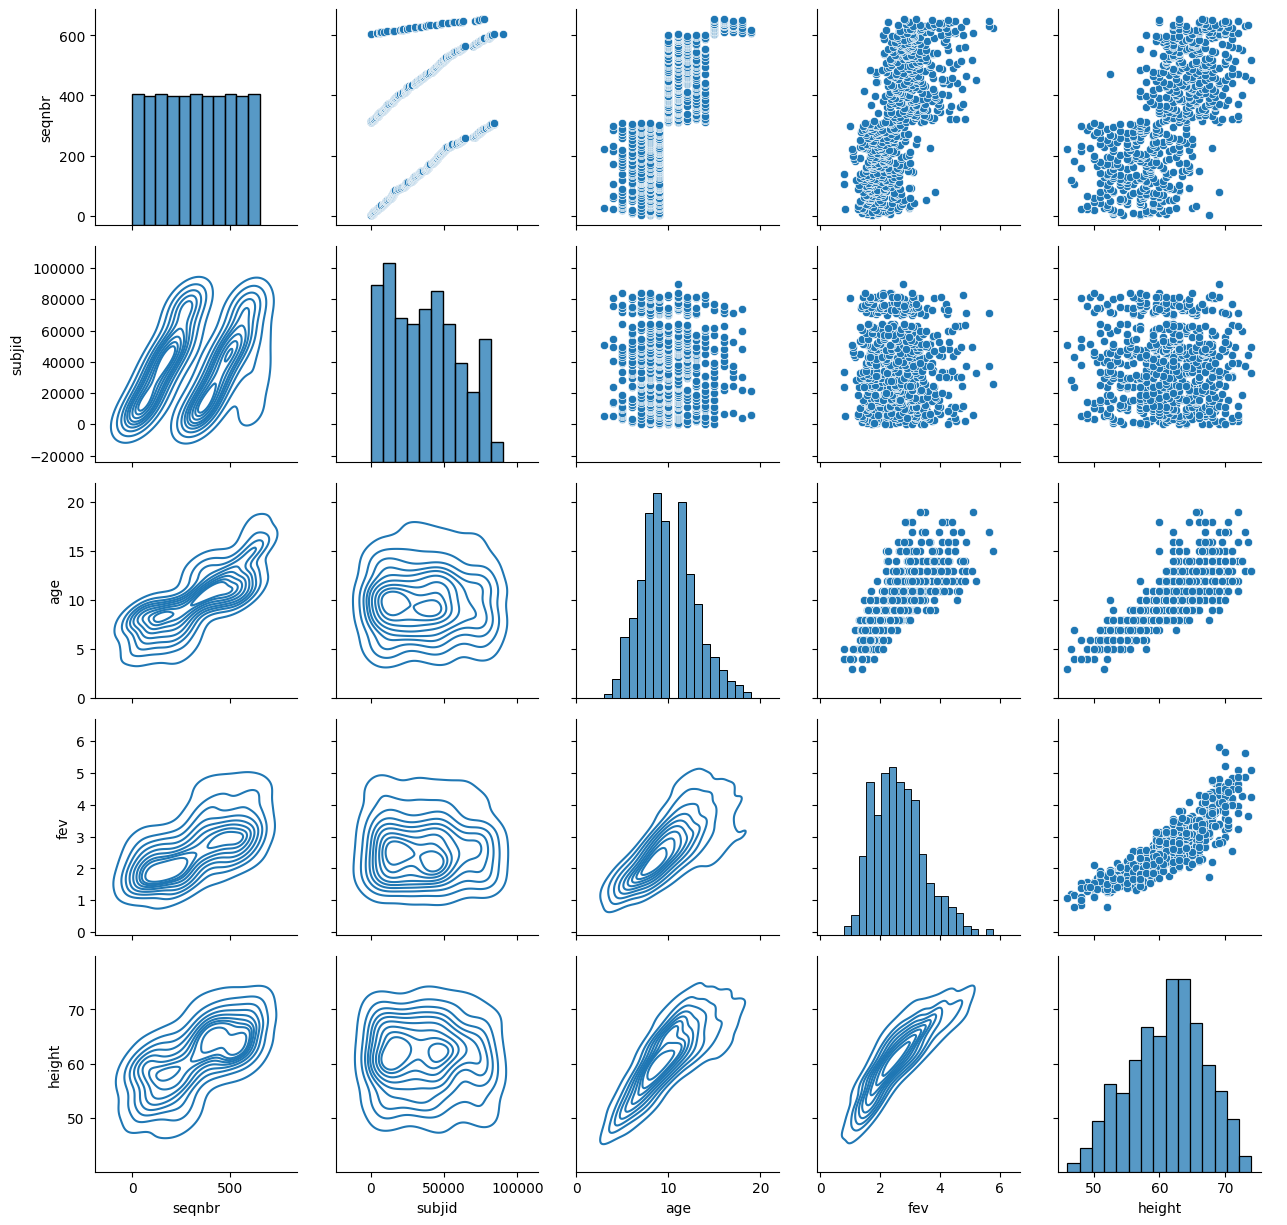

In [ ]:
g = sns.PairGrid(df.iloc[:,0:])
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.add_legend()

# del g

In [ ]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c2448ad98a83c126c1cc1b89e34b1eed858939514b253f2234d94151729fa201
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
#Mirar principalmente las interacciones y el mapa de calor de las correlaciones

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

profile

Output hidden; open in https://colab.research.google.com to view.

La verdad es que profiling report es impresionante porque te da toda la info, para hacer la depuración, en este caso solo nos centramos en el mapa de calor de las variables y vemos si hay correlación de fev con el resto

In [ ]:
# Librería estadística!
import scipy.stats as stats

# Función para calcular VCramer (dos nominales de entrada!)
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer


# Ejemplo uso univariante
#cramers_v(vinosCompra['Etiqueta'],vinosCompra['Beneficio'])

# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(df.apply(lambda x: cramers_v(x,varObj)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a FEV').update_yaxes(categoryorder="total ascending")



A priori la única variable que descartamos es subjid, ya que es la muestra que muestra úna autocorrelación cercana a 0 con fev(lógico  ya que solo es
un número de identificación). Sorprende que seqnbr, que tendría que ser independiente, esté relacionada con fev. Es posible que esta correlación sea espúrea (lo comprobaremos en el modelo de regresión). Height y Age parecen las más importantes a priori.

###3. Ajusta el mejor modelo de regresión lineal con variables originales y sin interacciones entre las variables.

In [ ]:
#dejamos solo las independientes
df_imput = df.drop(['fev','subjid'],axis=1)

In [ ]:
# Función necesaria
from sklearn.model_selection import train_test_split

# Pra el muestreo, creamos 4 objetos: predictores para tr y tst y variable objetivo para tr y tst.
X_train, X_test, y_train, y_test = train_test_split(df_imput,varObj, test_size=0.2, random_state=42)

# Comprobamos dimensiones
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (523, 5) (523,)
Testing dataset shape: (131, 5) (131,)


In [ ]:
# Genero el training con la objetivo dentro
data_train = X_train.join(y_train)
data_train.head()

seqnbr  age  height sex smoke    fev
321     322   12    71.0   1     2  4.550
456     457   12    68.0   1     2  4.411
340     341   10    62.0   1     2  1.937
29       30    9    60.0   2     2  2.100
570     571   10    65.0   1     2  3.090

In [ ]:
# Importamos la api para fórmulas (en concreto ols para regresión)
from statsmodels.formula.api import ols

# Ajusto regresión de prueba
results = ols('fev ~ sex + age + height',data=data_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     564.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          6.86e-163
Time:                        17:03:38   Log-Likelihood:                -281.61
No. Observations:                 523   AIC:                             571.2
Df Residuals:                     519   BIC:                             588.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2829      0.260    -16.450      0.000      -4.794      -3.771
sex[T.2]      -0.1540      0.037     -4.117      0.000      -0.227      -0.081
age            0.0601      0.011      5.629      0.000       0.039       0.081
height         0.1043      0.005     19.223      0.000       0.094       0.115
==============================================================================
Omnibus:                       11.573   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.840
Skew:                           0.155   Prob(JB):                     0.000134
Kurtosis:                       3.850   Cond. No.                         892.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2-ajustado de 0.76 un poco bajo, pero todas las variables significativas salvo la constante. Sex es negativa, es posible que las chicas tengan los pulmones más pequeños?? ( ni idea la verdad) 🤔
)

In [ ]:
# Función para generar la fórmula por larga que sea
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

# Aplicamos a fórmula de modelo completo
form=ols_formula(data_train,'fev')
form


'fev ~ seqnbr + age + height + sex + smoke'

In [ ]:
# Ajusto regresión según fórmula completa
modeloC = ols(form,data=data_train).fit()
modeloC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     339.3
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.13e-160
Time:                        10:47:38   Log-Likelihood:                -280.37
No. Observations:                 523   AIC:                             572.7
Df Residuals:                     517   BIC:                             598.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3239      0.272    -15.869      0.000      -4.859      -3.789
sex[T.2]      -0.1512      0.038     -4.031      0.000      -0.225      -0.078
smoke[T.2]     0.0695      0.066      1.047      0.296      -0.061       0.200
seqnbr         0.0002      0.000      1.226      0.221      -0.000       0.001
age            0.0538      0.014      3.981      0.000       0.027       0.080
height         0.1039      0.005     19.131      0.000       0.093       0.115
==============================================================================
Omnibus:                       11.866   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.540
Skew:                           0.180   Prob(JB):                     0.000155
Kurtosis:                       3.822   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Todas las variabes son significativas salvo la constante y smoke. El R2 es de 0,76, por lo que vamos a ver si podemos aumentarlo, buscando el modelo óptimo sin interacción:

In [ ]:
pip install relativeImp

In [ ]:
from relativeImp import relativeImp

# Nombres de predictores (en modo dummy) donde quitamos la constante
names=X.columns.tolist()[1:]

# Calculamos importancia relativa
df_results = relativeImp(X.join(y), outcomeName = 'fev', driverNames = names)

# Ordenamos valores
df_results.sort_values(by='normRelaImpt', ascending=False)

driver  rawRelaImpt  normRelaImpt
4      height     0.390431     50.940543
3         age     0.213459     27.850544
2      seqnbr     0.122504     15.983358
0    sex[T.2]     0.024286      3.168704
1  smoke[T.2]     0.015765      2.056851

In [ ]:
import plotly.express as px

# Gráfico de importancia relativa en base al R2
px.bar(df_results,x='normRelaImpt',y='driver',title='Importancia relativa por aportación al R2').update_yaxes(categoryorder="total ascending").show()


In [ ]:
# Proceso backward de eliminación de efectos según p-valor
form2=ols_formula(data_train,'fev','smoke','sex','height','seqnbr',
                  'age')

# Ajusto regresión sin prop_missings
modeloC2 = ols(form,data=data_train).fit()
modeloC2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     339.3
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.13e-160
Time:                        10:47:47   Log-Likelihood:                -280.37
No. Observations:                 523   AIC:                             572.7
Df Residuals:                     517   BIC:                             598.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3239      0.272    -15.869      0.000      -4.859      -3.789
sex[T.2]      -0.1512      0.038     -4.031      0.000      -0.225      -0.078
smoke[T.2]     0.0695      0.066      1.047      0.296      -0.061       0.200
seqnbr         0.0002      0.000      1.226      0.221      -0.000       0.001
age            0.0538      0.014      3.981      0.000       0.027       0.080
height         0.1039      0.005     19.131      0.000       0.093       0.115
==============================================================================
Omnibus:                       11.866   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.540
Skew:                           0.180   Prob(JB):                     0.000155
Kurtosis:                       3.822   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones para test modelo completo
df_y_pred = modeloC.predict(X_test)

# Cálculo de performance
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, df_y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, df_y_pred))

# Gráfico de real frente a prediccion para alguna variable
#plt.scatter(X_test.Acidez, y_test, color="black")
#plt.scatter(X_test.Acidez, vinos_y_pred, color="blue")

Root Mean squared error: 0.40
Coefficient of determination: 0.81


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Función para comparación por validación cruzada
def cross_val_lin(formula, data, seed=12345):
      # Generamos las matrices de diseño según la fórmula de modelo completo
      y, X = patsy.dmatrices(formula, data, return_type='dataframe')

      model = LinearRegression()

      # Establecemos esquema de validación fijando random_state (reproducibilidad)
      cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=seed)

      # Obtenemos los resultados de R2 para cada partición tr-tst
      scores = cross_val_score(model, X, y, cv=cv)

      # Sesgo y varianza
      print('Modelo: ' + formula)
      print('Coeficiente de determinación R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

      #sns.violinplot(y=scores,palette='viridis')

      return(scores)


In [ ]:
form2 = 'fev ~ age + height + sex + smoke'
form3 = 'fev ~ seqnbr + age + height'
form4 = 'fev ~ seqnbr + age + height + smoke'
form5 = 'fev ~ seqnbr + age + height + sex '
form6 = 'fev ~ age + height'


# Creamos lista de fórmulas
list_form = [form,form2,form3,form4,form5,form6]
list_form

# Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_lin(x,df, seed=2022),list_form))

# Trasnponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_res.T.melt()
results.columns = ['Modelo','R2']
results.head()

Modelo: fev ~ seqnbr + age + height + sex + smoke
Coeficiente de determinación R2: 0.767 (0.030)
Modelo: fev ~ age + height + sex + smoke
Coeficiente de determinación R2: 0.767 (0.030)
Modelo: fev ~ seqnbr + age + height
Coeficiente de determinación R2: 0.760 (0.030)
Modelo: fev ~ seqnbr + age + height + smoke
Coeficiente de determinación R2: 0.760 (0.031)
Modelo: fev ~ seqnbr + age + height + sex 
Coeficiente de determinación R2: 0.767 (0.029)
Modelo: fev ~ age + height
Coeficiente de determinación R2: 0.760 (0.030)


Modelo        R2
0       0  0.785631
1       0  0.713944
2       0  0.819497
3       0  0.745960
4       0  0.763848

El mejor modelo sin interacciones parece ser que es el modelo que incluye seqnbr + age + height + sex como regresores

###4. Ajusta el mejor modelo de regresión lineal con variables originales y con interacciones entre las variables que resulten relevantes.

Hacemos el mismo proceso que hemos hecho sin interacciones para elegir el mejor modelo con iteracción

In [ ]:
form7 = 'fev ~ age + height + sex * smoke'
form8 = 'fev ~ seqnbr * age + height'
form9 = 'fev ~ seqnbr + age + height * smoke'
form10 = 'fev ~ seqnbr + age + height * sex '
form11= 'fev ~ age + height + seqnbr*sex'


# Creamos lista de fórmulas
list_form = [form7,form8,form9,form10,form3,form11]
list_form

# Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_lin(x,df, seed=2022),list_form))

# Trasnponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_res.T.melt()
results.columns = ['Modelo','R2']
results.head()

Modelo: fev ~ age + height + sex * smoke
Coeficiente de determinación R2: 0.767 (0.030)
Modelo: fev ~ seqnbr * age + height
Coeficiente de determinación R2: 0.763 (0.031)
Modelo: fev ~ seqnbr + age + height * smoke
Coeficiente de determinación R2: 0.761 (0.031)
Modelo: fev ~ seqnbr + age + height * sex 
Coeficiente de determinación R2: 0.777 (0.029)
Modelo: fev ~ seqnbr + age + height
Coeficiente de determinación R2: 0.760 (0.030)
Modelo: fev ~ age + height + seqnbr*sex
Coeficiente de determinación R2: 0.771 (0.029)


Modelo        R2
0       0  0.789804
1       0  0.710706
2       0  0.820205
3       0  0.735906
4       0  0.771243

De los modelos con Interacción el mejor modelo es el que tiene como regresores seqnbr + age + height * smoke. Por otro lado también mejora el R2 del modelo que habíamos escogido sin interacciones ya que tiene mejor comportamiento en generalización

# EJERCICIO 2. series temporales

###2.1- Lectura y representación de la serie. Descomposición. Conclusiones.

In [ ]:
# Leer el archivo CSV y guardarlo como un DataFrame
df2 = pd.read_excel('/content/drive/MyDrive/Documentos/MASTER UCM/Mínería de datos - Guillermo/Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428/Datos/defunciones.xlsx')
# Información del dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0                     468 non-null    object
 1   Todas las causas  468 non-null    int64 
 2   Tumores           468 non-null    int64 
 3   Causas externas   468 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.8+ KB


In [ ]:
df2

Todas las causas  Tumores  Causas externas
0        1980M01             28681     4883             1277
1        1980M02             23906     4493             1122
2        1980M03             25275     4957             1244
3        1980M04             22500     4523             1214
4        1980M05             22781     4893             1228
..           ...               ...      ...              ...
463      2018M08             33177     9370             1472
464      2018M09             30293     9079             1306
465      2018M10             32879     9629             1275
466      2018M11             34338     9315             1234
467      2018M12             37033     9743             1268

[468 rows x 4 columns]

Datos de causas de defunciones desde 1980 hasta 2018 a nivel mensual. No missings.  Vamos a trabajar con la serie de **Tumores**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from rpy2.robjects.packages import importr, data

In [ ]:
# Convertir en serie temporal
df2.index = pd.to_datetime(df2.iloc[:, 0].str.strip(), format='%YM%m')
df2 = df2.iloc[:, 1:]  # Eliminar la columna sin nombre del índice

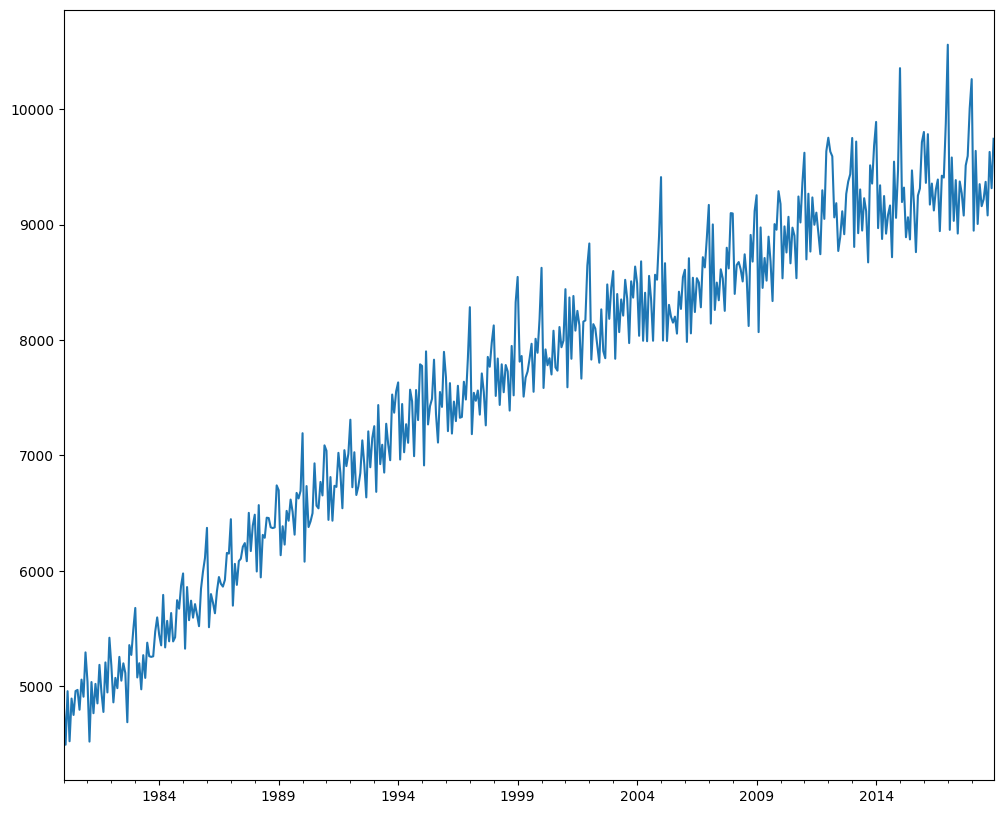

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)
df2.Tumores.plot()
plt.show()

La serie defunciones por tumores presenta una clara tendencia creciente. Descomponemos para tratar de captar la tendencia y la estacionalidad se la serie. Posteriormente se comprueba si los residuos de la descomposición aditiva son estacionarios.

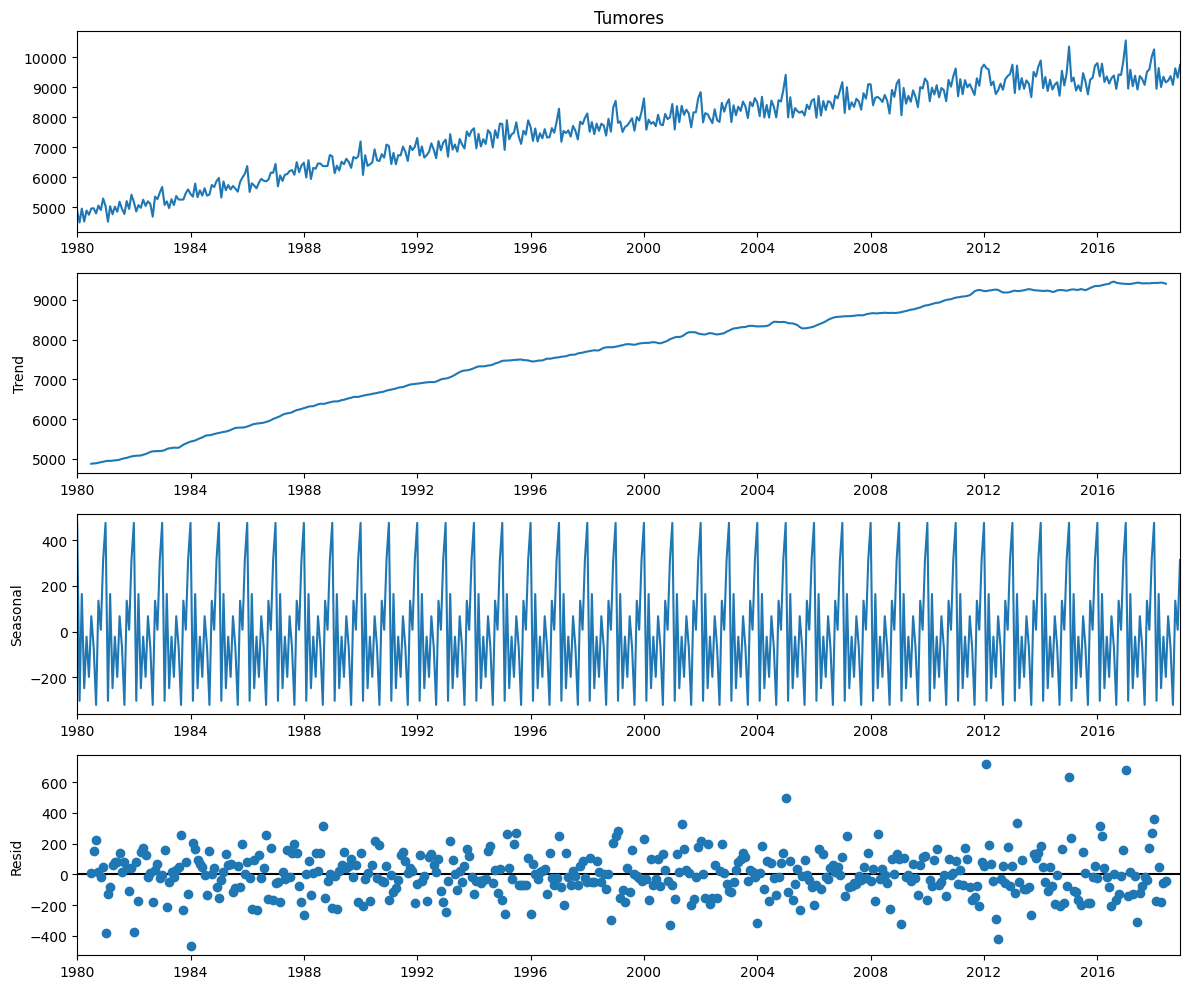

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición aditiva
df2_desc_Ad = seasonal_decompose(df2['Tumores'], model='additive',period=12)
df2_desc_Ad.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression ='ct')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(df2_desc_Ad.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.913262e+00
p-value                        5.704945e-13
#Lags Used                     1.700000e+01
Number of Observations Used    4.380000e+02
Critical Value (1%)           -3.979589e+00
Critical Value (5%)           -3.420561e+00
Critical Value (10%)          -3.132974e+00
dtype: float64


De acuerdo al test de DF los residuos de la descomposición son estacionarios. En prncipio, esto significa que la serie una vez que le quitas trend y seasonality es esacionario, lo cual facilita mucho la vida a la hora de hacer la fututa predicción.

###2. Partición training y test (los últimos 2 años de datos).

In [ ]:
tum_tr = df2.Tumores[:'2016-12-01']
tum_tst = df2.Tumores['2017-01-01':]

###3- Mejor modelo de suavizado exponencial. ¿Pasa el test residual de Ljung.Box?

In [ ]:
import statsmodels.tsa.holtwinters as ets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
#forecast_accuracy(fc, test.values)

# Función para evaluar modelo
def eval_model(model,tr,tst,name='Model',lags=12):
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid, lags=lags, return_df=True).lb_pvalue)
    pred = model.forecast(steps=len(tst))
    fig1, ax = plt.subplots()
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction')
    plt.legend(loc='upper left')
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
    plt.title(tit)
    plt.ylabel('Pasajeros')
    plt.xlabel('Date')
    plt.show()
    print(lb)

In [ ]:
ses = ets.SimpleExpSmoothing(tum_tr).fit()

ses.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                Tumores   No. Observations:                  444
Model:             SimpleExpSmoothing   SSE                       38912394.774
Optimized:                       True   AIC                           5057.163
Trend:                           None   BIC                           5065.355
Seasonal:                        None   AICC                          5057.255
Seasonal Periods:                None   Date:                 Thu, 29 Jun 2023
Box-Cox:                        False   Time:                         10:48:12
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1645012                alpha                 True
initial_level              4878.9600                  l.0                 True
------------------------------------------------------------------------------
"""

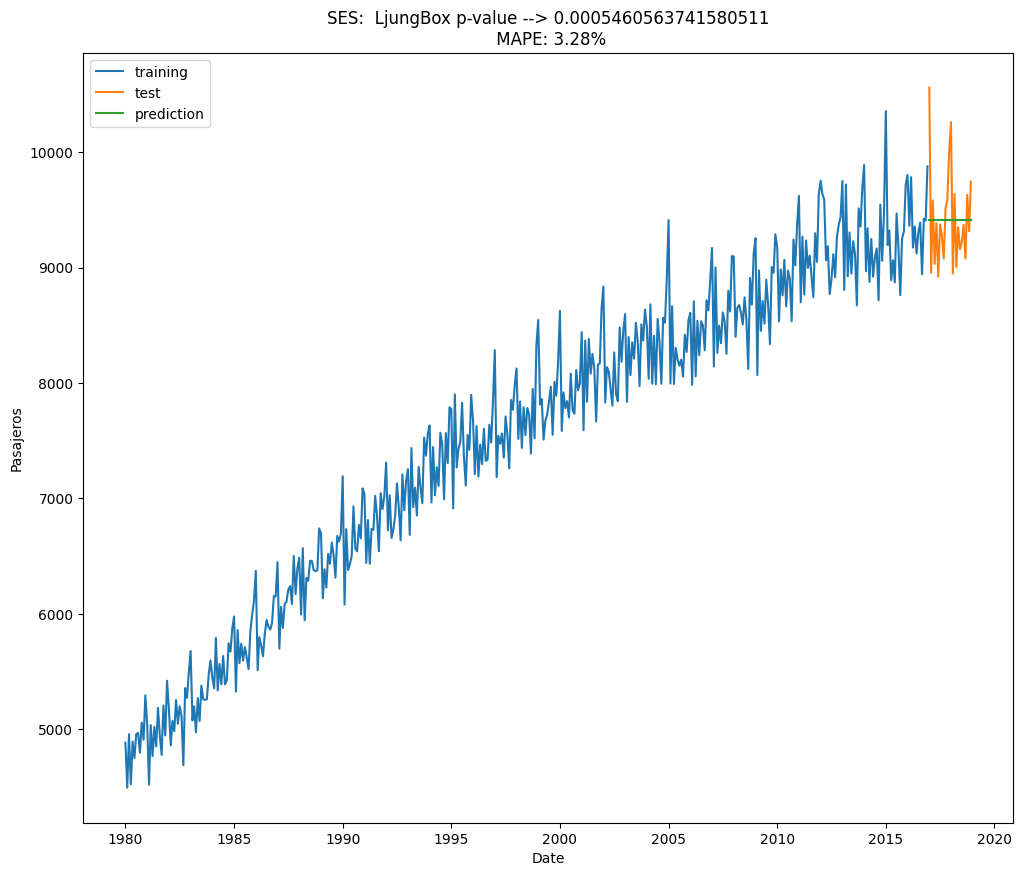

0.0005460563741580511


In [ ]:
# Evaluar SES
eval_model(ses,tum_tr,tum_tst,'SES')

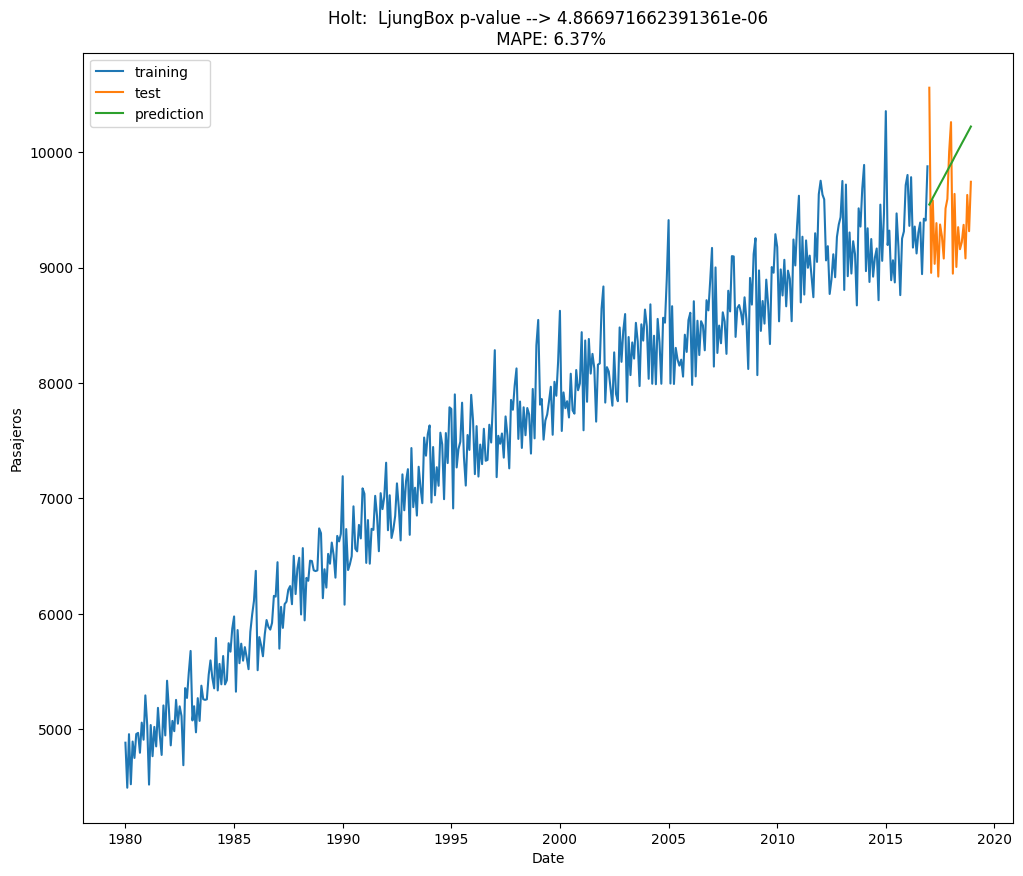

4.866971662391361e-06


In [ ]:
# Suavizado de Holt
holt = ets.Holt(tum_tr).fit()
holt.summary()

eval_model(holt,tum_tr,tum_tst,'Holt')

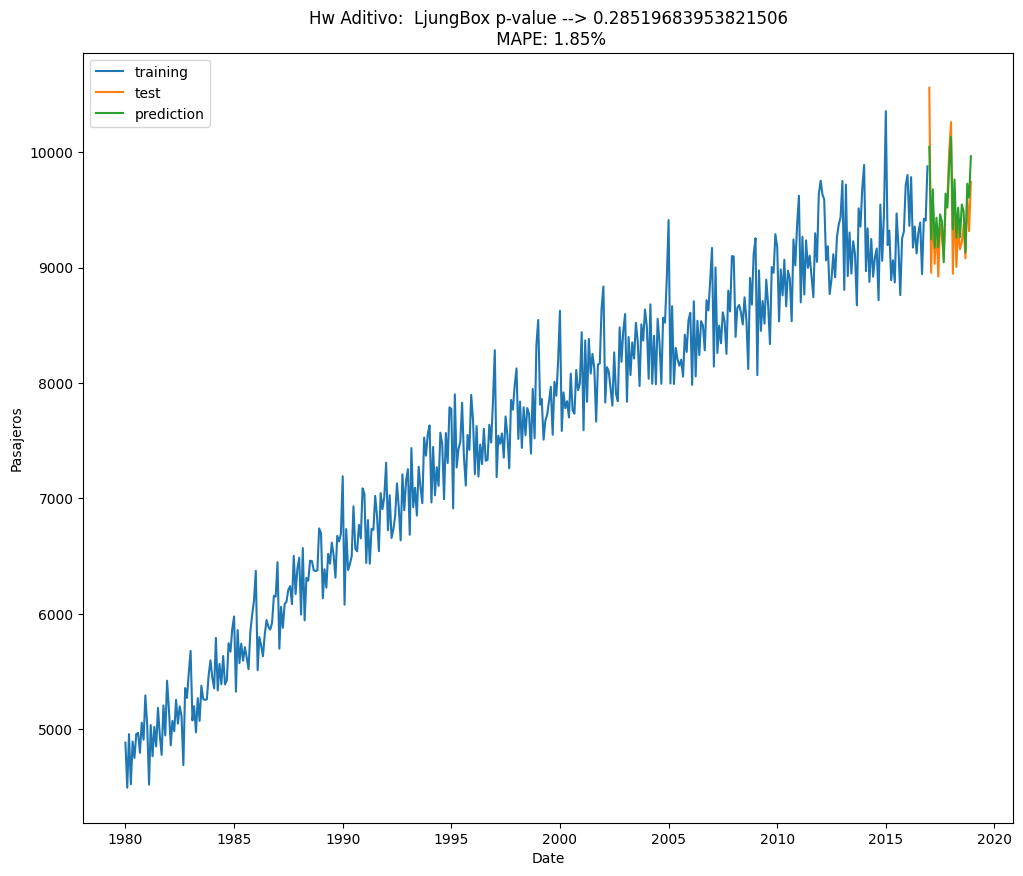

0.28519683953821506


In [ ]:
#Holt Winters Aditivo
hw_add = ets.ExponentialSmoothing(tum_tr,trend='add', damped_trend=False, seasonal='add').fit()
hw_add.summary()

eval_model(hw_add,tum_tr,tum_tst,'Hw Aditivo')

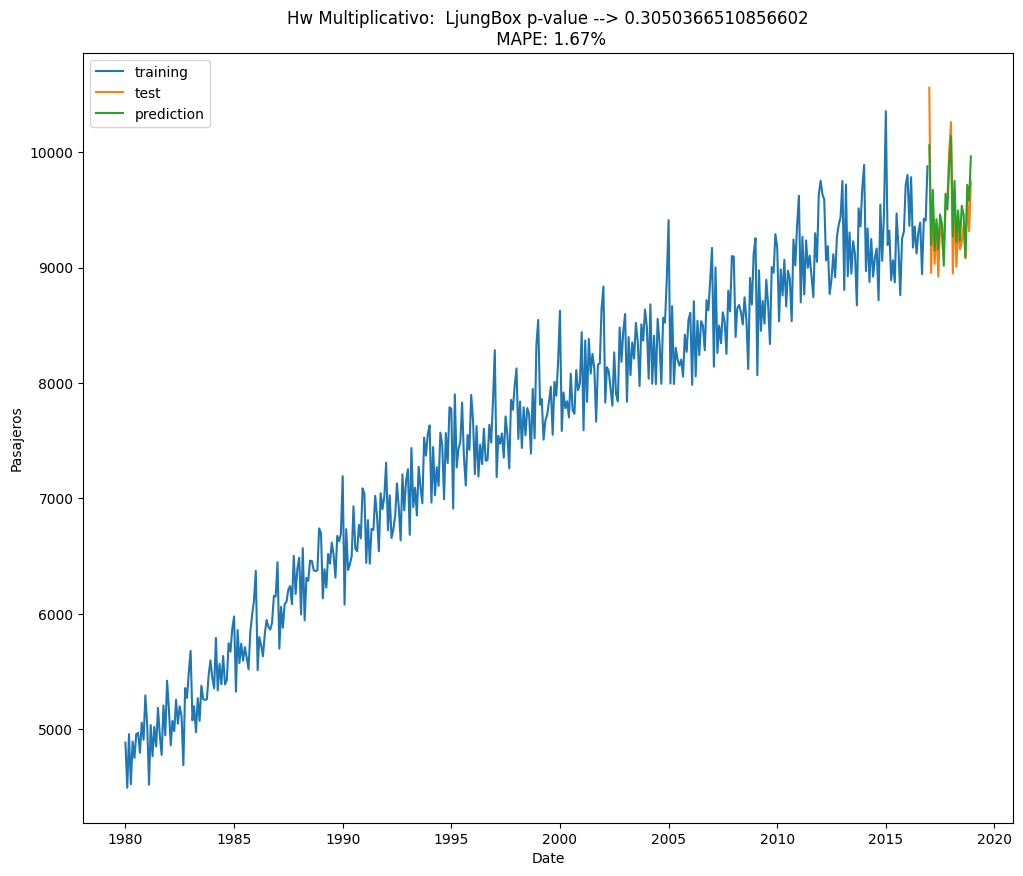

0.3050366510856602


In [ ]:
#Holt Winters Multiplicativo
hw_mul = ets.ExponentialSmoothing(tum_tr,trend='mul', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

eval_model(hw_mul,tum_tr,tum_tst,'Hw Multiplicativo')

De acuerdo al MAPE el mejor modelo es el Holt Winters Multiplicativo, aunque no fasa el test de Ljung Box. p-value > que 0.05 que es el vc. Vamos a probar con los ARIMA:


###4- Mejor modelo ARIMA. ¿Pasa el test residual de Ljung.Box?

In [ ]:
import scipy.stats as stats
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Función para evaluar residuos a través de contrastes de hipótesis (se busca que los residuos sean WN, ya que sino significa que el modelo no capta toda tendencia y sigue habiendo autocorrelación temporal)
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean,
    constant variance and normally distributed. First two are must, while last two are good to have.
    If the first two are not met, we have not fully captured the information from the data for prediction.
    Consider different model and/or add exogenous variable.

    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant.

    Lags should be min(2*seasonal_period, T/5)

    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html

    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(sm.stats.acorr_ljungbox(x=residuals, lags=lags).lb_pvalue)
    norm_p_val =  stats.jarque_bera(residuals)[1]
    adfuller_p = adfuller(residuals)[1]


    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));

    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    plt.show()
    print("** Mean of the residuals: ", np.around(resid_mean,2))

    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3),
        "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")

    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3),
        "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")

    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3),
        "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")

    return ts_ax, acf_ax, kde_ax

In [ ]:
# Función para evaluar modelo auto_arima
def eval_model_Aarima(model,tr,tst,name='Model',lags=12):
      lb = np.mean(sm.stats.acorr_ljungbox(model.resid(), lags=lags, return_df=True).lb_pvalue)
      pred = model.predict(n_periods=len(tst))
      fig1, ax = plt.subplots()
      ax.plot(tr, label='training')
      ax.plot(tst, label='test')
      ax.plot(pred, label='prediction')
      plt.legend(loc='upper left')
      tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
      plt.title(tit)
      plt.ylabel('Serie')
      plt.xlabel('Date')
      plt.show()
      model.plot_diagnostics(figsize=(14,10))
      plt.show()


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(tum_tr, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(arima_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=6018.225, Time=5.01 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7686.209, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=6.98 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6965.375, Time=2.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=9201.080, Time=0.08 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=6156.045, Time=4.12 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=5987.165, Time=5.42 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=6327.223, Time=3.12 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=5887.019, Time=17.54 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=5988.096, Time=7.27 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=7274.099, Time=6.11 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=11.02 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=5933.254, Time=14.07 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=5946.417, Time=13.36 sec
 ARIMA(0,0,0)(2,0,0)[12] 

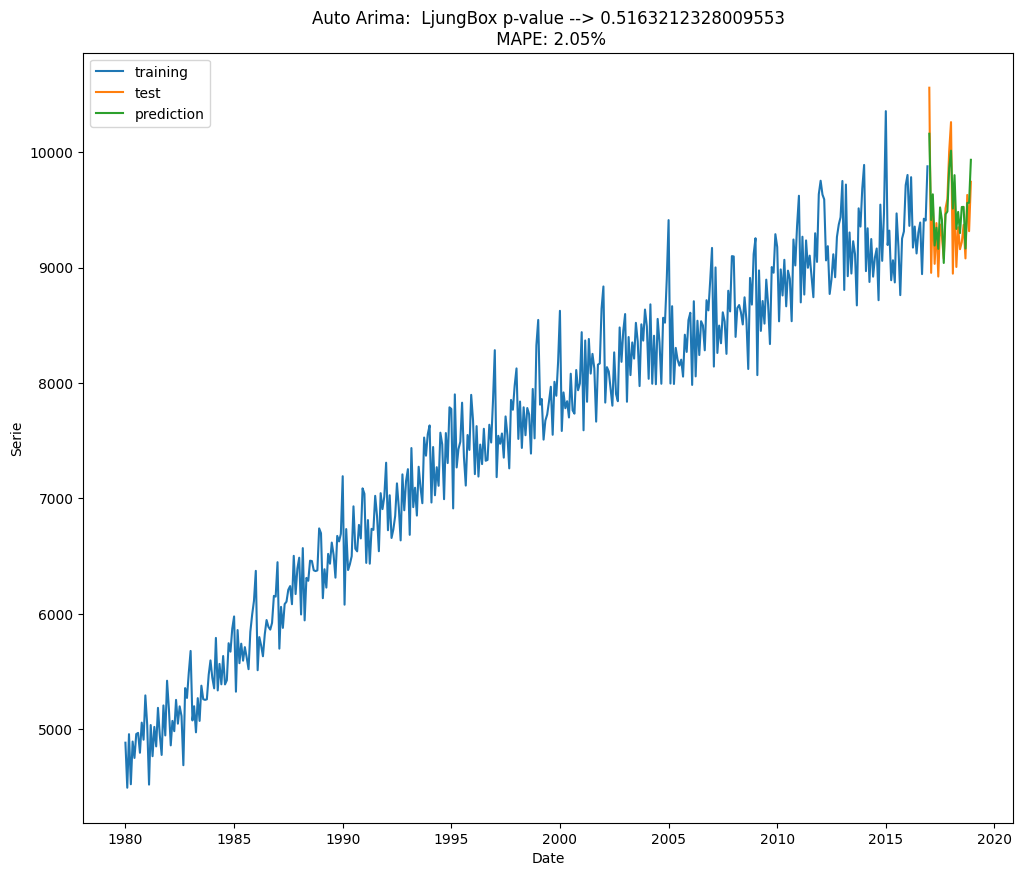

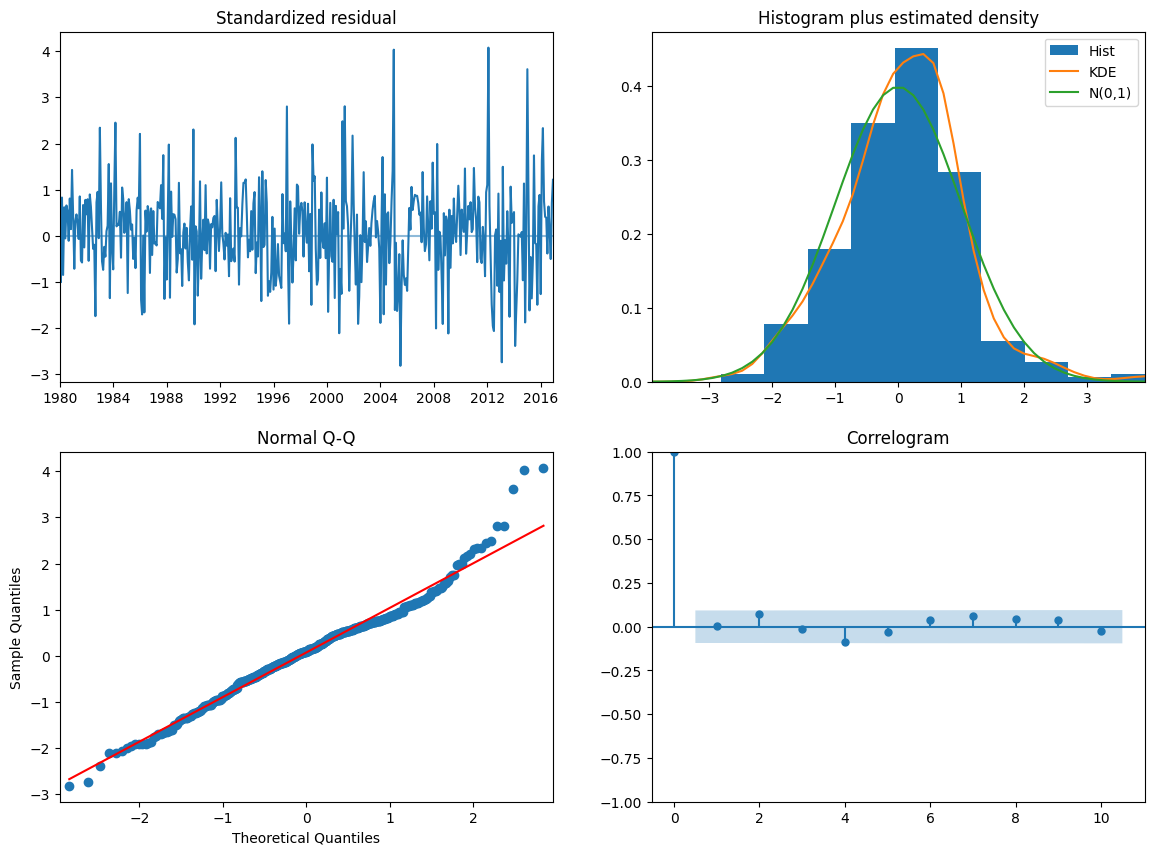

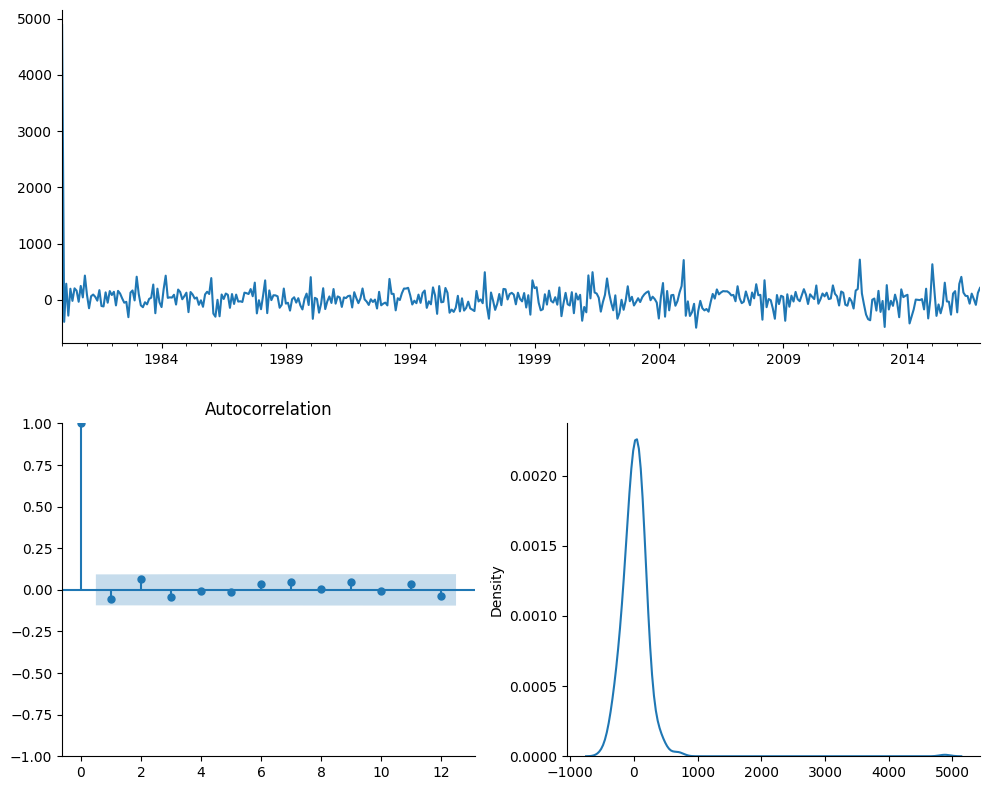

** Mean of the residuals:  24.78

** Ljung Box Test, p-value: 0.516 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<Axes: xlabel=' '>,
 <Axes: title={'center': 'Autocorrelation'}>,
 <Axes: ylabel='Density'>)

In [ ]:
eval_model_Aarima(arima_auto,tum_tr,tum_tst,'Auto Arima')
residcheck(arima_auto.resid(),12)

El mejor modelo que identifica auto_ARIMA es ARIMA(2,0,1)(2,0,0) (es decir ARMA (2,1) en lo regular y AR(2) en lo estacional. Sin embargo, no pasa el test residual Ljung Box, por lo que los residuos no son estacionarios. Esto significa que el modelo no recoje toda la tendencia o estacionariedad de la serie y la predicción está sesgada.

###5- Comparación. En relación al MAPE en el conjunto de tets, ¿Qué modelo resulta  más preciso en sus predicciones?

De acuerdo a los resultados, el modelo con menor MAPE es el suavizado exponencial HW multiplicativo. Aunque es cierto que no pasa el test LB

# EJERCICIO 3 ACP

In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 21.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=d605731eacfecdf00ea35aed19919fec58eb5b7bfacabe2d9a0fde9b27a191ea
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

#PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#Factor Analysis
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Encoding
from sklearn.preprocessing import LabelEncoder

###1. 1- Leer el archivo

In [ ]:
# Leer el archivo CSV y guardarlo como un DataFrame
df3 = pd.read_excel('G:/Mi unidad/Documentos/MASTER UCM/Mínería de datos - Guillermo/Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428/Datos/wisconsin.xlsx')
# Información del dataset
df3.info()
print()
df3.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df3.diagnosis = le.fit_transform(df3.diagnosis)
le.classes_

array(['B', 'M'], dtype=object)

###2. Obtener la matriz de correlaciones entre las variables numéricas. Conclusiones

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [ ]:
# Matriz de predictores
X = df3.drop(['diagnosis','id'], axis=1)
# Variable objetivo para la regresión logística
y = df3['diagnosis']

# Partición training-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

y_train.shape

(483,)

In [ ]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [ ]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

Exisen muchos valores de correlación altos ya que eso es síntoma de estructura de varianzas compartidas y nos viene bien para captar esa varianza común con una buena componente situada correctamente. S e aprecia correlación grupal y no solo par

### 3. Sabiendo que se trata de predecir la variable binaria diagnosis (‘M,’B’). ¿Cuál sería el modelo adecuado de predicción? ¿Qué problemas auguras a la luz de la información sobre las correlaciones del archivo?

El mejor modelo para predecir una variable binaria es la regresión logítica (logit), ya que nos permite manejar la naturaleza binaria de la variable de respuesta, proporcionando probabilidades estimadas de pertenecer a una de las 2 categorías.


El problema que tiene es de mulicolinealidad que afecta a la explicabilidad de las regresoras, or esta razón se hace un ACP

### 4. Como posible estrategia se plantea la realización de un ACP para la reducción de dimensiones y un modelo de predicción adecuado utilizando como predictores las componentes principales resultantes de tal forma que se retenga al menos el 70% de la variabilidad del archivo.


### a. Valora la adecuación muestral a priori

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(X)

(39362.120841131145, 0.0)

Rechazo claro de la hipótesis nula (H0: Matriz de correlaciones = Matriz identidad)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(X)

(array([0.83463512, 0.64352613, 0.85334054, 0.86403253, 0.814716  ,
        0.87939755, 0.89192843, 0.90027723, 0.82510264, 0.83181381,
        0.83412178, 0.48458942, 0.84290718, 0.85199881, 0.64427854,
        0.8712978 , 0.82547994, 0.83516673, 0.5832182 , 0.81149623,
        0.82308704, 0.60329755, 0.88493799, 0.82044529, 0.75316064,
        0.85127714, 0.90222587, 0.89105242, 0.69074764, 0.81233969]),
 0.8322253094698239)

A nivel de variable texture_se presenta un resultado muy bajo, por esta razón vamos a probar a quitarla, a ver si aumenta.

In [ ]:
calculate_kmo(X.drop(['texture_se'], axis=1))

(array([0.83383775, 0.71380996, 0.85236309, 0.86613237, 0.8119036 ,
        0.87978917, 0.89148028, 0.8989748 , 0.83287842, 0.83044023,
        0.83272641, 0.83872779, 0.85713086, 0.61630817, 0.87022696,
        0.82281541, 0.83113907, 0.58402361, 0.80709036, 0.82286537,
        0.71827893, 0.88349999, 0.82210308, 0.75028776, 0.85248406,
        0.90181629, 0.88817103, 0.70426333, 0.81112789]),
 0.8398097573868066)


Unidades de medida distintas implican necesidad de escalar los datos para que las variables con mayor escala de medida no "pesen" más de lo que deben en la solución.

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
pd.DataFrame(X)

### b. Realiza el ACP sobre las numéricas. ¿Cuántas componentes se deberían considerar para cumplir el criterio mencionado? Interpreta la componente 1.

In [ ]:
pca = PCA() #n_components=0.7
scores = pca.fit_transform(X)
pd.DataFrame(scores)

0           1          2          3          4         5   \
0    1160.142574 -293.917544  48.578398  -8.711975  32.000486  1.265415   
1    1269.122443   15.630182 -35.394534  17.861283  -4.334874 -0.225872   
2     995.793889   39.156743  -1.709753   4.199340  -0.466529 -2.652811   
3    -407.180803  -67.380320   8.672848 -11.759867   7.115461  1.299436   
4     930.341180  189.340742   1.374801   8.499183   7.613289  1.021160   
..           ...         ...        ...        ...        ...       ...   
564  1414.126684  110.222492  40.065944   6.562240  -5.102856 -0.395424   
565  1045.018854   77.057589   0.036669  -4.753245 -12.417863 -0.059637   
566   314.501756   47.553525 -10.442407  -9.771881  -6.156213 -0.870726   
567  1124.858115   34.129225 -19.742087 -23.660881   3.565133  4.086390   
568  -771.527622  -88.643106  23.889032   2.547249 -14.717566  4.418123   

           6         7         8         9   ...        20        21  \
0    0.931337  0.148167  0.745463  0.589359  ...  0.021189  0.000241   
1   -0.046037  0.200804 -0.485828 -0.084035  ...  0.005237  0.021069   
2   -0.779745 -0.274026 -0.173874 -0.186994  ... -0.009865 -0.002394   
3   -1.267304 -0.060555 -0.330639 -0.144155  ...  0.011169  0.007063   
4   -0.335522  0.289109  0.036087 -0.138502  ... -0.009916  0.010269   
..        ...       ...       ...       ...  ...       ...       ...   
564 -0.786751  0.037082 -0.452530 -0.235185  ... -0.017214  0.007864   
565  0.449831  0.509154 -0.449986  0.493247  ...  0.011219 -0.001905   
566 -2.166493 -0.442279 -0.097398 -0.144667  ... -0.003362 -0.002249   
567 -1.705401 -0.359964  0.385030  0.615467  ... -0.006130 -0.010804   
568 -2.815752  0.030039 -0.423451 -0.301439  ...  0.018435 -0.009224   

           22        23        24        25        26        27        28  \
0    0.002528  0.011560  0.005773  0.001377 -0.001982  0.001293  0.001989   
1    0.001565  0.006968 -0.006978  0.001411 -0.000083 -0.001347  0.000686   
2   -0.004125 -0.004007  0.000709 -0.003781  0.000178  0.000018 -0.000775   
3    0.001537  0.007003 -0.010261 -0.002899  0.000016  0.001369 -0.002139   
4    0.002204  0.002764  0.002455  0.001665  0.003290  0.000273  0.001783   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.002317 -0.002384 -0.003637 -0.008211  0.002418  0.001234 -0.000078   
565 -0.003028 -0.007931  0.002905 -0.002519  0.000212  0.001006 -0.000621   
566 -0.001248 -0.003927 -0.000921  0.000573 -0.001325  0.000025  0.000484   
567  0.005841  0.001127 -0.002646  0.001862  0.002698  0.001235 -0.000809   
568  0.000242  0.011529  0.012745  0.003539  0.001129 -0.004446  0.000243   

           29  
0    0.000704  
1   -0.001061  
2    0.000405  
3   -0.001657  
4    0.000327  
..        ...  
564 -0.000455  
565 -0.000741  
566 -0.000285  
567  0.001217  
568  0.001468  

[569 rows x 30 columns]

In [ ]:
pip install pca

Note: you may need to restart the kernel to use updated packages.


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [70.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [70.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 3 Principal Components explain [79.23%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

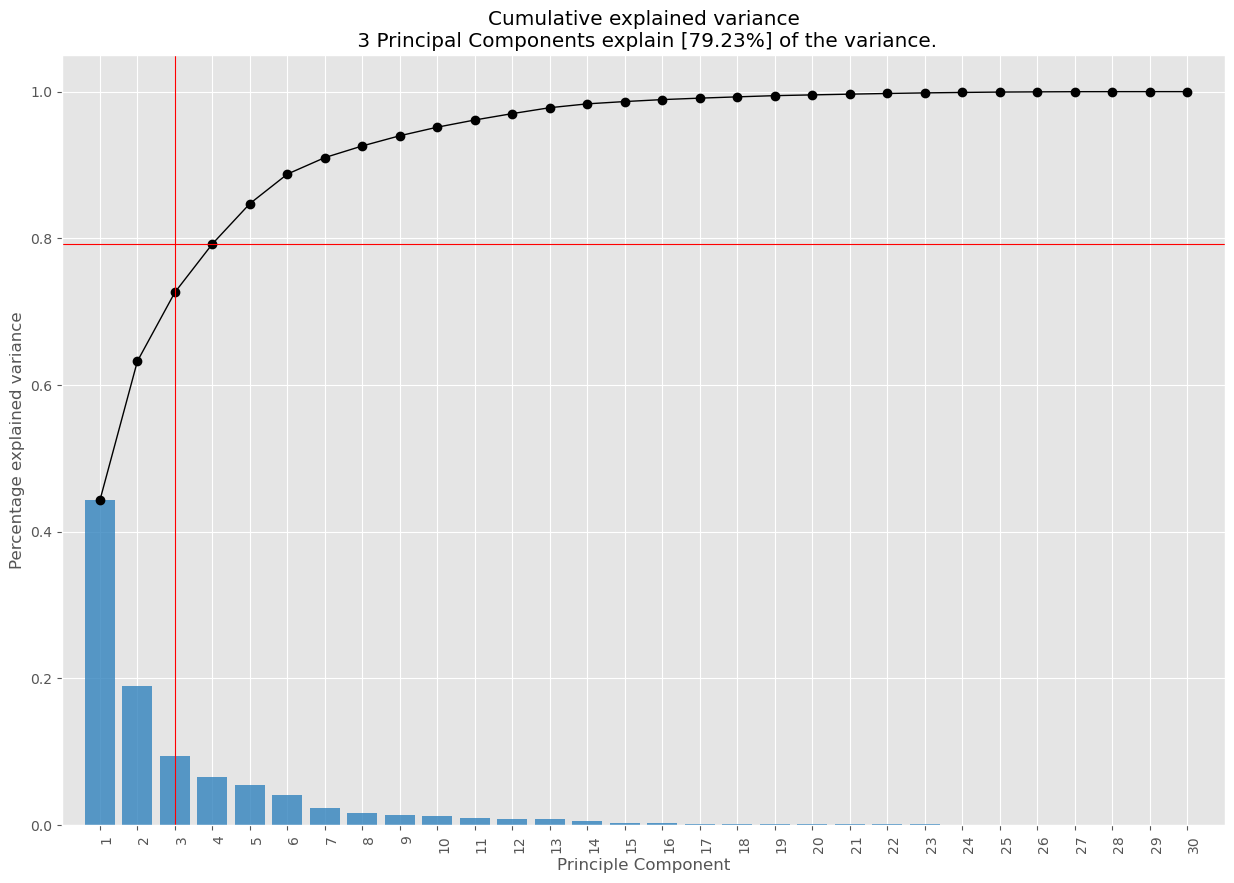

In [ ]:
# Load library
from pca import pca

# Initialize pca with default parameters
model = pca(normalize=True,n_components=0.7)

# Fit transform
results = model.fit_transform(X)

# Plot the explained variance
model.plot()

Para lograr el 70% e variabilidad explicada hay que coger 3 componentes

In [ ]:
model.results

{'loadings':      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
 PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
 PC3    -0.008531      0.064550       -0.009314   0.028700        -0.104292   
 
      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 PC1          0.239285        0.258400             0.260854       0.138167   
 PC2          0.151892        0.060165            -0.034768       0.190349   
 PC3         -0.074092        0.002734            -0.025564      -0.040240   
 
      fractal_dimension_mean  ...  radius_worst  texture_worst  \
 PC1                0.064363  ...      0.227997       0.104469   
 PC2                0.366575  ...     -0.219866      -0.045467   
 PC3               -0.022574  ...     -0.047507      -0.042298   
 
      perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
 PC1         0.2

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from psynlig import (
    pca_explained_variance,
    pca_residual_variance,
    pca_explained_variance_bar,
    pca_explained_variance_pie,
    pca_1d_loadings,
    pca_2d_loadings,
    pca_2d_scores)

###c. Crea el input con estas componentes (matriz de scores o puntuaciones) y ajusta un modelo de predicción adecuado para la variable objetivo diagnosis.

In [ ]:
# Definimos los pasos del pipe
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=.7)),
         ('clf', LogisticRegression())]
# Construimos el pipeline
pipe_lr = Pipeline(steps)

# Ajustamos el proceso del pipe en training
pipe_lr.fit(X_train, y_train)
# Predicciones en training
train_predictions = pipe_lr.predict(X_train)
# Predicciones en test
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       303
           1       0.94      0.92      0.93       180

    accuracy                           0.95       483
   macro avg       0.95      0.94      0.94       483
weighted avg       0.95      0.95      0.95       483

TEST:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



In [ ]:
# Extraer el PCA como paso 1,1
model2 = pipe_lr.steps[1][1]

# Número de componentes
n_pcs= model2.components_.shape[0]
n_pcs

3

Posible acceso a la matriz de puntuaciones o scores del modelo (nuevas variables para predecir la variable objetivo). Voy a usar la generada al


In [ ]:
scores2=model2.transform(StandardScaler().fit_transform(X)) #no lo voy a usar pero sería la matriz de puntuaciones del pipeline

scores_df=pd.DataFrame(scores)

column_names = [f'CP{i+1}' for i in range(30)]  # Genera una lista con los nuevos nombres de columna

scores_df = scores_df.rename(columns=dict(enumerate(column_names)))  # Renombra las columnas usando un diccionario de nombre

data = scores_df.join(y)

data

CP1        CP2       CP3       CP4       CP5       CP6       CP7  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

          CP8       CP9      CP10  ...      CP22      CP23      CP24  \
0   -0.398407 -0.157118 -0.877402  ...  0.068850  0.084519 -0.175256   
1    0.240988 -0.711905  1.106995  ... -0.094578 -0.217718  0.011290   
2    0.097374  0.024066  0.454275  ... -0.060309 -0.074291  0.102762   
3    1.059565 -1.405440 -1.116975  ... -0.203266 -0.124105  0.153430   
4    0.636376 -0.263805  0.377704  ... -0.017650  0.139454 -0.005332   
..        ...       ...       ...  ...       ...       ...       ...   
564 -0.035471  0.987929  0.256989  ... -0.067000  0.088590  0.107898   
565 -1.113360 -0.105207 -0.108632  ...  0.019563 -0.055405  0.086135   
566  0.341887  0.393917  0.520877  ...  0.063352 -0.200312 -0.044819   
567 -0.280239 -0.542035 -0.089296  ... -0.042478  0.168820 -0.195969   
568  1.046354  0.374101 -0.047726  ... -0.243238  0.037915 -0.075111   

         CP25      CP26      CP27      CP28      CP29      CP30  diagnosis  
0   -0.151020 -0.201503 -0.252585 -0.033914  0.045648 -0.047169          1  
1   -0.170510 -0.041129  0.181270  0.032624 -0.005687 -0.001868          1  
2    0.171158  0.004735  0.049569  0.047026  0.003146  0.000751          1  
3    0.077496 -0.275225  0.183462  0.042484 -0.069295 -0.019937          1  
4    0.003062  0.039254  0.032168 -0.034786  0.005038  0.021214          1  
..        ...       ...       ...       ...       ...       ...        ...  
564  0.219520 -0.122900  0.159198  0.009853  0.007119 -0.001415          1  
565  0.001197  0.065889 -0.068512 -0.023575 -0.027486 -0.010419          1  
566  0.002429  0.007095 -0.023691 -0.002578  0.006706  0.003770          1  
567  0.377830 -0.198192 -0.027409 -0.068086 -0.084163 -0.023783          1  
568 -0.017508  0.347115  0.127381 -0.009516 -0.060913 -0.019476          0  

[569 rows x 31 columns]

In [ ]:
nan_values = data['diagnosis'].isna().sum()
print("Number of NaN values in 'y' column: ", nan_values)

Number of NaN values in 'y' column:  0


In [ ]:
from statsmodels.formula.api import logit
form = 'diagnosis ~ CP1 + CP2 + CP3'
# Ajustar modelo 1
logit = logit(form,data).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.108409
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Thu, 29 Jun 2023   Pseudo R-squ.:                  0.8358
Time:                        13:11:17   Log-Likelihood:                -61.685
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                8.278e-136
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6762      0.242     -2.796      0.005      -1.150      -0.202
CP1            2.3183      0.304      7.616      0.000       1.722       2.915
CP2           -1.2829      0.212     -6.059      0.000      -1.698      -0.868
CP3           -0.4878      0.141     -3.468      0.001      -0.764      -0.212
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#D. Conclusiones del modelo por validación cruzada repetida. Interpreta el parámetro de la componente 1

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Función para comparación por validación cruzada
def cross_val_log(formula, data, seed=12345):
    # Generamos las matrices de diseño según la fórmula de modelo completo
    y, X = patsy.dmatrices(formula, data, return_type='dataframe')
    y = y.iloc[:,0].ravel()

    model = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none')

    # Establecemos esquema de validación fijando random_state (reproducibilidad)
    cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=seed)

    # metrics.get_scorer_names() --> Posibilidades de distintas métricas!

    # Obtenemos los resultados de R2 para cada partición tr-tst
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv)

    # Sesgo y varianza
    print('Modelo: ' + formula)
    print('AUC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

    #sns.violinplot(y=scores,palette='viridis')

    return(scores)

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

cross_val_log(form, data, seed=12345)



Modelo: diagnosis ~ CP1 + CP2 + CP3
AUC: 0.990 (0.007)


array([0.98048942, 0.98742378, 0.99874411, 0.99933862, 0.98420374,
       0.97248608, 0.99404762, 0.99475925, 0.99459459, 0.99176548,
       0.99364878, 0.99555414, 0.98279221, 0.99285714, 0.99236948,
       0.98946999, 1.        , 0.98081841, 0.98711755, 0.99661247,
       0.99532242, 0.99041005, 0.98930839, 0.97634271, 0.99731724,
       0.96683761, 0.99587171, 0.9982906 , 0.99007937, 0.99575163,
       0.99264952, 0.99425676, 0.99772727, 0.98398744, 0.9845614 ,
       0.99669118, 0.98360656, 0.99066023, 0.98630137, 0.9961885 ,
       0.99120879, 0.98196457, 0.99715909, 0.99227799, 0.99583333,
       0.98735043, 0.98986486, 0.99577922, 0.98649584, 0.99525617,
       0.99222973, 0.98084772, 0.99902597, 0.99403299, 0.98457411,
       0.99875   , 0.97262197, 0.99558824, 0.99162641, 0.99059053,
       0.99726496, 0.99737963, 0.9909375 , 0.98974359, 0.98170732,
       0.99487179, 0.99465812, 0.9903517 , 0.98344595, 0.99188838,
       0.99424552, 0.99473499, 0.99565653, 0.98153846, 0.98596

el área bajo la curva ROC es de 0.990 con una desviación estándar de 0.007. Muy buena tasa de acierto con respecto de fallos.

In [ ]:
np.exp(logit.params)

Intercept     0.508541
CP1          10.158264
CP2           0.277231
CP3           0.613948
dtype: float64

El OR de CP1 es 10.158264, es decir, si CP1 aumenta en una unidad, el odds de tener un resultado positivo en la variable dependiente se espera que sea aproximadamente 10.158264 veces mayor en comparación con el odds correspondiente cuando CP1 no cambia, manteniendo todas las demás variables constantes.

#EJERCICIO 4: ELECCIONES / CLUSTERING

###1- Escoge 10 variables numéricas presentes en el conjunto de datos y realiza un  ligera depuración sobre este subconjunto de variables (Valores raros, Outliers,  NAs..)  

In [ ]:
import pandas as pd
# Leer el archivo CSV y guardarlo como un DataFrame
df4 = pd.read_excel('G:/Mi unidad/Documentos/MASTER UCM/Mínería de datos - Guillermo/Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428/Datos/DatosEleccionesEspaña.xlsx')
# Información del dataset
df4.info()
print()
df4.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          8119 non-null   object 
 1   CodigoProvincia               8119 non-null   int64  
 2   CCAA                          8119 non-null   object 
 3   Population                    8119 non-null   int64  
 4   TotalCensus                   8119 non-null   int64  
 5   AbstentionPtge                8119 non-null   float64
 6   AbstencionAlta                8119 non-null   int64  
 7   Izda_Pct                      8119 non-null   float64
 8   Dcha_Pct                      8119 non-null   float64
 9   Otros_Pct                     8119 non-null   float64
 10  Izquierda                     8119 non-null   int64  
 11  Derecha                       8119 non-null   int64  
 12  Age_0-4_Ptge                  8119 non-null   float64
 13  Age

Name                            8102
CodigoProvincia                   52
CCAA                              19
Population                      3597
TotalCensus                     3310
AbstentionPtge                  5675
AbstencionAlta                     2
Izda_Pct                        6569
Dcha_Pct                        6682
Otros_Pct                       4319
Izquierda                          2
Derecha                            2
Age_0-4_Ptge                    3761
Age_under19_Ptge                5891
Age_19_65_pct                   6215
Age_over65_pct                  6778
WomanPopulationPtge             4524
ForeignersPtge                  2329
SameComAutonPtge                6151
SameComAutonDiffProvPtge        4207
DifComAutonPtge                 5574
UnemployLess25_Ptge             2342
Unemploy25_40_Ptge              2681
UnemployMore40_Ptge             2751
AgricultureUnemploymentPtge     2525
IndustryUnemploymentPtge        2538
ConstructionUnemploymentPtge    2505
S

### Elegimos las 10 variables numéricas y vemos su boxplot para ver raros y outliers

In [ ]:
# Seleccionar las columnas deseadas
data = df4[['Population', 'SUPERFICIE', 'Servicios', 'ForeignersPtge', 'SameComAutonPtge', 'Explotaciones', 'Dcha_Pct', 'Industria', 'Unemploy25_40_Ptge','AbstentionPtge']]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data:
    if data[i].dtype != 'object':  # Skip non-numeric columns
        sns.boxplot(x=data[i])
        print(i)
        plt.show()
## Vemos posibles outliers en vel conexión y num_lineas. Vamos a comprobarlo con z_score

In [ ]:
data.describe()

Population     SUPERFICIE      Servicios  ForeignersPtge  \
count  8.119000e+03    8110.000000    8057.000000     8119.000000   
mean   5.741855e+03    6214.695257     172.149684        5.619553   
std    4.621520e+04    9218.194603    2446.812300        7.348553   
min    5.000000e+00       2.578400       0.000000       -8.960000   
25%    1.660000e+02    1839.191800       0.000000        1.060000   
50%    5.490000e+02    3487.737450       0.000000        3.590000   
75%    2.427500e+03    6893.877800      40.000000        8.180000   
max    3.141991e+06  175022.910000  177677.000000       71.470000   

       SameComAutonPtge  Explotaciones     Dcha_Pct     Industria  \
count       8119.000000    8119.000000  8119.000000   7931.000000   
mean          81.629141    2447.204582    48.915409     23.419367   
std           12.289063   15062.738051    19.945087    158.610811   
min            0.000000       1.000000     0.000000      0.000000   
25%           75.806000      22.000000    38.690500      0.000000   
50%           84.493000      52.000000    51.582000      0.000000   
75%           90.462000     137.000000    62.201000     14.000000   
max          127.156000   99999.000000   100.000000  10521.000000   

       Unemploy25_40_Ptge  AbstentionPtge  
count         8119.000000     8119.000000  
mean            37.003976       26.506951  
std             20.317306        7.540091  
min              0.000000        0.000000  
25%             28.571000       21.678000  
50%             39.935000       26.429000  
75%             46.667000       31.475000  
max            100.000000       57.576000

VALORES RAROS

In [ ]:
# Quitar porcentaje superior a 100
data.loc[~data.SameComAutonPtge.between(0, 100), "SameComAutonPtge"] = np.nan

# Comprobamos nuevos límites de la variable
data.SameComAutonPtge.min(),data.SameComAutonPtge.max()

(0.0, 100.0)

In [ ]:
# Quitamos  99999 de la variable Explotaciones y lo pasamos a NA
data.Explotaciones.replace(99999.000000,np.nan,inplace=True)

# Comprobamos el nuevo máximo
data.Explotaciones.max()


C:\Users\alvar\AppData\Local\Temp\ipykernel_10620\1428329522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Explotaciones.replace(99999.000000,np.nan,inplace=True)


4759.0

In [ ]:
# Superficie de España 505.990 km², vamos a quitar el municipio de más de 170k...

data.SUPERFICIE.replace(99999.000000,np.nan,inplace=True)

# Comprobamos el nuevo máximo
data.SUPERFICIE.max()


C:\Users\alvar\AppData\Local\Temp\ipykernel_10620\3828223249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.SUPERFICIE.replace(99999.000000,np.nan,inplace=True)


175022.91

OUTLIERS

In [ ]:
data.select_dtypes(include=np.number).apply(lambda x: x.skew())


Population            45.996406
SUPERFICIE             6.073564
Servicios             57.504563
ForeignersPtge         2.497559
SameComAutonPtge      -1.532291
Explotaciones          6.151386
Dcha_Pct              -0.468014
Industria             44.274183
Unemploy25_40_Ptge     0.213126
AbstentionPtge        -0.049941
dtype: float64

In [ ]:
## Función para gestionar outliers
def gestiona_outliers(col,clas = 'check'):

     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/col.mad())>6

     # Calcular primer cuartil
     q1 = col.quantile(0.25)
     # Calcular tercer cuartil
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR)) | (col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)


# Llamada en modo check
data.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

Population
SUPERFICIE
Servicios
ForeignersPtge
SameComAutonPtge
Explotaciones
Dcha_Pct
Industria
Unemploy25_40_Ptge
AbstentionPtge


Population  SUPERFICIE  Servicios  ForeignersPtge  SameComAutonPtge  \
0    0.000000    0.000000   0.000000         0.00000          0.431247   
1    1.798251    1.763255   1.514211         1.03461          0.000000   
2    1.798251    1.763255   1.514211         1.03461          0.431247   

   Explotaciones  Dcha_Pct  Industria  Unemploy25_40_Ptge  AbstentionPtge  
0       0.000000       0.0   0.000000                 0.0             0.0  
1       2.131148       0.0   1.790443                 0.0             0.0  
2       2.131148       0.0   1.790443                 0.0             0.0

In [ ]:
## Función manual de winsor con clip+quantile
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array,
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'),
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [ ]:
# Aplicar la gestión de outliers en modelo winsor
data = data.apply(lambda x: gestiona_outliers(x,clas='winsor'))

# Contemos si ha desaparecido algún resgitro o algo
# vinos_winsor.apply(lambda x: x.isna().sum()/x.count()*100)


Population
SUPERFICIE
Servicios
ForeignersPtge
SameComAutonPtge
Explotaciones
Dcha_Pct
Industria
Unemploy25_40_Ptge
AbstentionPtge


MISSINGS

In [ ]:
pip install feature_engine

In [ ]:
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer

# Moda: Solo nominales
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)

# knn: Solo numéricas
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)

# Chain equations: solo numéricas
imputer_itImp = skl_imp.IterativeImputer(max_iter=10, random_state=0)

# pip install feature_engine
import feature_engine.imputation as fe_imp

# Aleatoria: numéricas y nominales
imputer_rand = fe_imp.RandomSampleImputer()

# Mediana: solo numéricas
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')

# Media: solo numericas
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')

In [ ]:
# Fit/transform
data = pd.DataFrame(imputer_itImp.fit_transform(data),columns=data.columns)

###2- Agrega los valores por CCAA, distinguiendo entre valores relativos (agregación por la media) y valores absolutos (agregación por suma)

In [ ]:
data = data.join(df4['CCAA'])


In [ ]:
data_mean=data.groupby('CCAA').mean()

###3- Valora la necesidad de escalar los datos y decide el tipo de distancia a aplicar

In [ ]:
data_mean

Population    SUPERFICIE    Servicios  ForeignersPtge  \
CCAA                                                                      
Andalucía        7217.094437   9962.893082   148.155204        5.502924   
Aragón            958.419973   6253.111623    19.968150        6.590410   
Asturias         7973.051282  12210.396372   185.169658        2.272308   
Baleares        11246.611940   7450.298552   336.671642       14.130299   
Canarias        15917.488636   8313.617853   415.503181        9.628523   
Cantabria        4487.019608   5143.464294   103.511273        2.573529   
CastillaLeón      820.805605   4178.376135    15.458387        3.291606   
CastillaMancha   1964.350381   7876.277080    36.743746        6.309619   
Cataluña         4875.221753   3381.839660   141.640971        8.363580   
Ceuta           49975.000000   1341.337100  1346.000000        6.110000   
ComValenciana    6399.865314   4194.929885   164.320212        9.744539   
Extremadura      2422.754522   9354.288870    43.881103        1.601938   
Galicia          6663.171975   9360.905737   151.239670        2.068949   
Madrid          11455.184358   4354.879675   369.999892       10.918771   
Melilla         49975.000000   6838.285223  1414.000000       15.120000   
Murcia          18887.844444  14667.908584   413.025236       11.987778   
Navarra          1818.375000   3620.271648    39.231618        4.631618   
PaísVasco        5870.111554   2832.514927   130.039144        4.156773   
Rioja            1239.563218   2991.693259    28.264368        5.657644   

                SameComAutonPtge  Explotaciones   Dcha_Pct  Industria  \
CCAA                                                                    
Andalucía              87.354248     264.890856  41.409270  27.268098   
Aragón                 79.417042      72.504665  54.711115   5.241547   
Asturias               86.720308     273.391654  46.295385  30.926030   
Baleares               64.388284     160.417910  48.681119  46.925373   
Canarias               76.895852     159.400664  45.635125  44.620221   
Cantabria              81.739010      99.987976  58.299588  17.699199   
CastillaLeón           86.511984      44.741437  64.860948   3.174784   
CastillaMancha         73.467060     124.721736  54.733021  10.177928   
Cataluña               78.891256      64.808545  15.489498  24.335915   
Ceuta                  68.254000       6.000000  62.709000  83.000000   
ComValenciana          76.292199     188.857593  49.068886  30.983657   
Extremadura            87.220801     166.730381  45.760687  10.593173   
Galicia                89.702385     248.441919  55.873277  32.678458   
Madrid                 68.252648      44.984771  57.527793  45.563880   
Melilla                59.947000       3.000000  61.451000  75.000000   
Murcia                 76.572756     466.377261  59.297022  86.428487   
Navarra                79.697886      58.726591  35.973989  11.430147   
PaísVasco              80.994072      67.281992   9.794203  35.295103   
Rioja                  76.781598      58.575736  59.471718   8.678161   

                Unemploy25_40_Ptge  AbstentionPtge  
CCAA                                                
Andalucía                43.231334       28.702028  
Aragón                   35.528335       25.033557  
Asturias                 43.440769       33.762987  
Baleares                 39.984045       33.574701  
Canarias                 42.537591       34.843398  
Cantabria                42.201020       26.880235  
CastillaLeón             31.672047       23.822925  
CastillaMancha           35.258565       22.698995  
Cataluña                 38.002856       34.286721  
Ceuta                    49.833000       47.411000  
ComValenciana            41.206493       21.888273  
Extremadura              39.391344       26.541096  
Galicia                  38.441118       30.870268  
Madrid                   42.508799       25.072363  
Melilla                  46.165000       48.650000  
Murcia 

Hay que escalar, por las variables que no están en porcentaje y que pueden afectar a la creación de grupos.

In [ ]:
# Escalado de datos
# ==============================================================================
X_scaled = scale(data_mean)
df_scaled = pd.DataFrame(X_scaled)

###4- Explora los métodos de clustering jerárquico para estos datos y decide el tipo de Linkage más adecuado.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from time import time


def plot_dendogram(model, **kwargs):

  '''
  Esta función extrae la información de un modelo AgglomerativeClustering
  y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
  '''

  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_,
                                        counts]).astype(float)

  # Plot
  dendrogram(linkage_matrix, **kwargs)
  plt.show()


ward :	0.01s


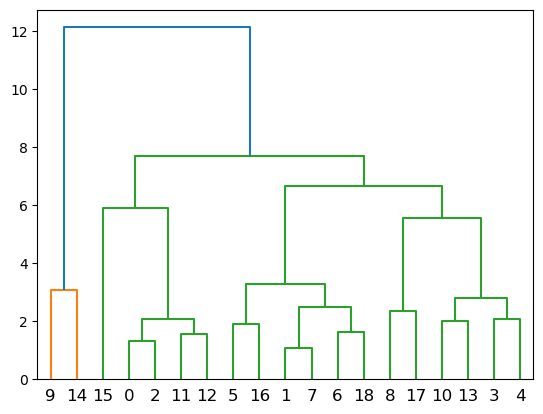

average :	0.00s


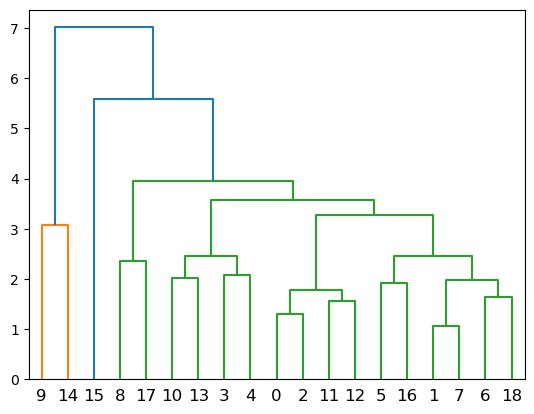

complete :	0.00s


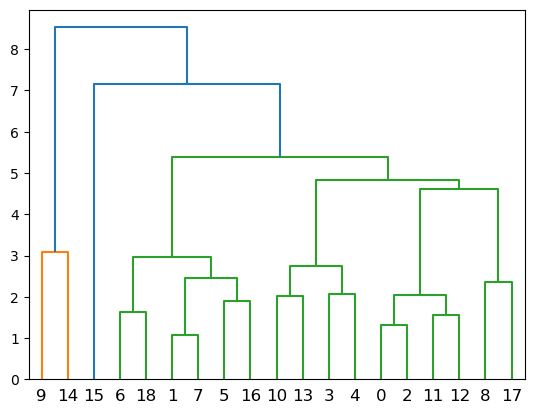

single :	0.00s


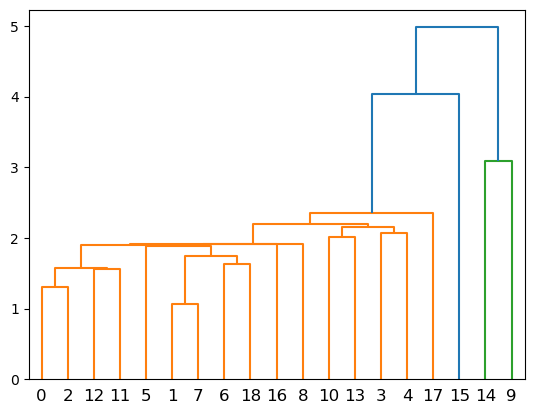

In [ ]:
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=None,
                            distance_threshold = 0)
    t0 = time()
    clustering.fit(X_scaled)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plt.clf()
    plot_dendogram(clustering)
    #plot_clustering(X_scaled, clustering.labels_, "%s linkage" % linkage)


#plt.show()

Decido quedarme con el método de mínima varianza de Ward y escojo 5 grupos ya que las alturas de corte parecen discriminar algo mejor a los grupos. Aunque es cierto que el primer grupo son solo 2 CCAA y el último grupo es bastante grande en comparación y hay bastante varianza dentro de los registros.

In [ ]:
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters  = 5
                     )
modelo_hclust_ward.fit(X=X_scaled)

cluster_labels = modelo_hclust_ward.fit_predict(X_scaled)

In [ ]:
silhouette_score(X_scaled, cluster_labels)

0.2790151475732195

In [ ]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_scaled, cluster_labels)

10.533278073035591

un valor de 10.53 implica que los grupos formados por el algoritmo de clustering tienen una buena separación y cohesión, lo cual indica que la técnica utilizada ha sido efectiva para agrupar los datos. Sin embargo, es importante tener en cuenta que la interpretación precisa del valor puede variar dependiendo del contexto y la naturaleza de los datos.

###5- Toma una decisión sobre el número de clusters a considerar y realiza un análisis cluster mediante el método k-means.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,10)

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cremos función scree_plot_kmeans para buscar el número de clusters óptimo
# con 3 métricas usuales. Wss, silueta y % de varianza explicada
# Input: data = dataset en bruto (se escala dentro de la propia función)
#        n_max = número máximo de grupos a evaluar
# ==============================================================================
from scipy.spatial.distance import cdist, pdist

def scree_plot_kmeans(data,n_max):
  range_n_clusters = range(2, n_max)
  X_scaled = scale(data_mean)
  inertias = []
  silhouette = []
  var_perc = []

  for n_clusters in range_n_clusters:
      modelo_kmeans = KMeans(
                          n_clusters   = n_clusters,
                          n_init       = 20,
                          random_state = 123
                      )
      modelo_kmeans.fit(X_scaled)
      cluster_labels = modelo_kmeans.fit_predict(X_scaled)
      inertias.append(modelo_kmeans.inertia_)
      silhouette.append(silhouette_score(X_scaled, cluster_labels))
      tss = sum(pdist(X_scaled)**2)/X_scaled.shape[0]
      bss = tss - modelo_kmeans.inertia_
      var_perc.append(bss/tss*100)

  fig, ax = plt.subplots(1, 3, figsize=(16, 6))
  ax[0].plot(range_n_clusters, inertias, marker='o')
  ax[0].set_title("Scree plot Varianza intra")
  ax[0].set_xlabel('Número clusters')
  ax[0].set_ylabel('Intra-cluster (inertia)')

  ax[1].plot(range_n_clusters, silhouette, marker='o')
  ax[1].set_title("Scree plot silhouette")
  ax[1].set_xlabel('Número clusters')
  ax[1].set_ylabel('Media índices silhouette');

  ax[2].plot(range_n_clusters, var_perc, marker='o')
  ax[2].set_title("Scree plot % Varianza")
  ax[2].set_xlabel('Número clusters')
  ax[2].set_ylabel('% de varianza explicada')

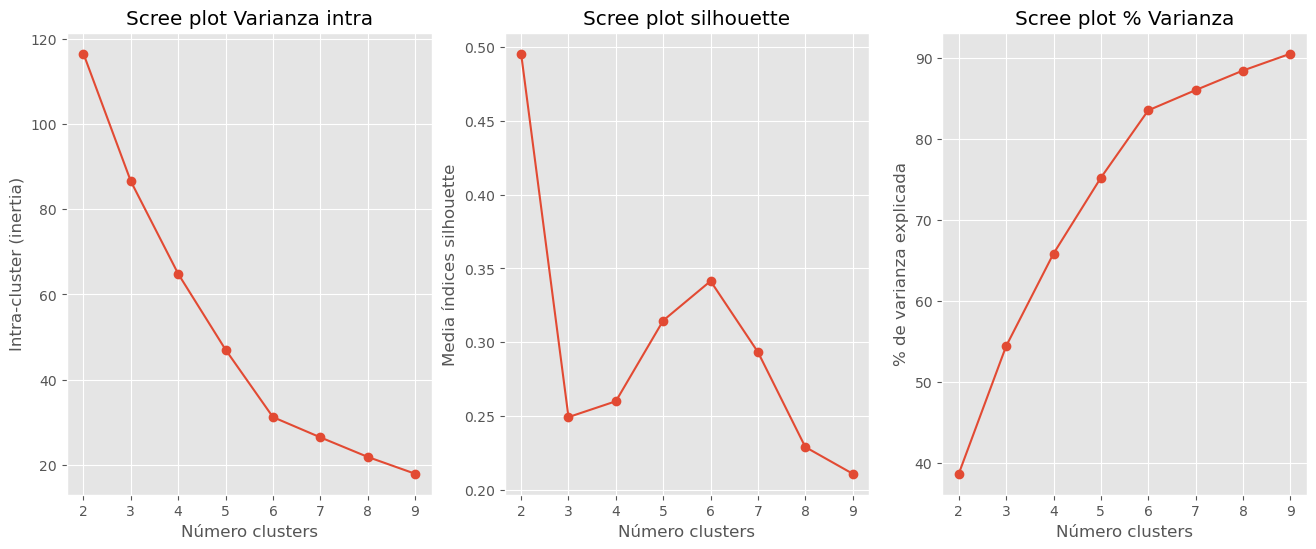

In [ ]:
scree_plot_kmeans(data_mean,10)
plt.show()

5 clusters recojen casi el 80% de la varianza

In [ ]:
# Modelo
# ==============================================================================
modelo_kmeans = KMeans(n_clusters=5, n_init=25, random_state=123)
modelo_kmeans.fit(X_scaled)
print('Varianza intra: ' + str(modelo_kmeans.inertia_))

print('Centroides')
print(modelo_kmeans.cluster_centers_)

print('Etiquetas')
modelo_kmeans.labels_[:5]

Varianza intra: 47.047433995755256
Centroides
[[-0.64538365 -0.36763189 -0.62927538 -0.50026816  0.21703428 -0.49197577
   0.66343158 -0.97376672 -1.13720783 -0.87955358]
 [-0.48389521 -0.95655899 -0.47033858 -0.2911634   0.25175732 -0.63861659
  -1.95595028 -0.38169098  0.22442495  0.26025006]
 [ 2.73951487 -0.7188051   2.75746208  0.9386331  -1.71868218 -1.16388899
   0.91607118  1.84726518  1.47879106  2.37391175]
 [ 0.12108663  0.3669957   0.12715778  1.10611084 -0.67100549  0.60913527
   0.22406806  0.71508843  0.33029384 -0.20913923]
 [-0.35146476  1.07761703 -0.39833011 -1.00824735  1.23798711  0.91445757
  -0.10044743 -0.31401649  0.10092824 -0.02127741]]
Etiquetas


array([4, 0, 4, 3, 3])

In [ ]:
print('Varianza intra: ' + str(modelo_kmeans.inertia_))

Varianza intra: 46.65205126479387


In [ ]:
cluster_labels = modelo_kmeans.labels_
silhouette_score(X_scaled, cluster_labels)

0.31473323171311224

In [ ]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_scaled, cluster_labels)

10.634670980355661

Este valor indica que la separación entre los clusters no es muy alta, ya que se encuentra cerca de 0. Sin embargo, el significado exacto del coeficiente de silueta depende del contexto específico del problema y de los datos utilizados. En general, se considera que un valor de coeficiente de silueta mayor a 0.5 indica una buena separación entre los clusters, mientras que valores menores a 0.5.

La comparación entre Jerárquico y K-means se decanta hacia el modelo de k-means ya que los indicadores del modelo son ligeramente superiores

###6- Muestra el biplot (puede ser proyección sobre dos de las variables que resulten relevantes o proyección sobre las dos primeras componentes principales de la matriz de entrada) y comenta los grupos formados. Interpreta los centroides.

In [ ]:
data_mean

Population    SUPERFICIE    Servicios  ForeignersPtge  \
CCAA                                                                      
Andalucía        7217.094437   9969.032611   148.510565        5.502924   
Aragón            958.419973   6253.111623    19.998632        6.590410   
Asturias         7973.051282  12210.396372   185.735043        2.272308   
Baleares        11246.611940   7450.298552   336.671642       14.130299   
Canarias        15917.488636   8313.617853   415.564394        9.628523   
Cantabria        4487.019608   5143.464294   103.692810        2.573529   
CastillaLeón      820.805605   4178.376135    15.466044        3.291606   
CastillaMancha   1964.350381   7876.277080    36.720348        6.309619   
Cataluña         4875.221753   3381.839660   141.640971        8.363580   
Ceuta           49975.000000   1341.337100  1346.000000        6.110000   
ComValenciana    6399.865314   4194.929885   164.355474        9.744539   
Extremadura      2422.754522   9360.845583    44.171404        1.601938   
Galicia          6663.171975   9405.368645   151.795117        2.068949   
Madrid          11455.184358   4354.879675   369.878957       10.918771   
Melilla         49975.000000   6359.166433  1414.000000       15.120000   
Murcia          18887.844444  14667.908584   413.807407       11.987778   
Navarra          1818.375000   3620.271648    39.231618        4.631618   
PaísVasco        5870.111554   2832.514927   130.095618        4.156773   
Rioja            1239.563218   2991.693259    28.264368        5.657644   

                SameComAutonPtge  Explotaciones   Dcha_Pct  Industria  \
CCAA                                                                    
Andalucía              87.386385     265.249677  41.409270  27.254851   
Aragón                 79.417042      71.617419  54.711115   5.247150   
Asturias               86.720308     272.756410  46.295385  31.136752   
Baleares               64.388284     160.417910  48.681119  46.925373   
Canarias               76.895852     163.439394  45.635125  45.340909   
Cantabria              81.739010     105.264706  58.299588  17.673203   
CastillaLeón           86.511984      44.259045  64.860948   3.192319   
CastillaMancha         73.467060     125.106275  54.733021  10.207835   
Cataluña               78.891256      64.776839  15.489498  24.339317   
Ceuta                  68.254000       6.000000  62.709000  83.000000   
ComValenciana          76.292199     189.433579  49.068886  31.032595   
Extremadura            87.220801     167.206718  45.760687  10.474591   
Galicia                89.702385     249.615711  55.873277  32.684713   
Madrid                 68.252648      49.783985  57.527793  45.832402   
Melilla                59.947000       3.000000  61.451000  75.000000   
Murcia                 76.572756     464.718519  59.297022  86.481481   
Navarra                79.697886      58.613971  35.973989  11.430147   
PaísVasco              80.994072      66.772908   9.794203  35.349270   
Rioja                  76.781598      58.718391  59.471718   8.678161   

                Unemploy25_40_Ptge  AbstentionPtge  cluster_kmeans  
CCAA                                                                
Andalucía                43.231334       28.702028               4  
Aragón                   35.528335       25.033557               0  
Asturias                 43.440769       33.762987               4  
Baleares                 39.984045       33.574701               3  
Canarias                 42.537591       34.843398               3  
Cantabria                42.201020       26.880235               0  
CastillaLeón             31.672047       23.822925               0  
CastillaMancha           35.258565       22.698995               0  
Cataluña                 38.002856       34.286721               1  
Ceuta                    49.833000       47.411000               2  
ComValenciana            41.206493       21.888273               3  
Extremadura

In [ ]:
data_mean_sorted = data_mean[['cluster_kmeans']].sort_values(by='cluster_kmeans')
data_mean_sorted

cluster_kmeans
CCAA                          
Rioja                        0
Aragón                       0
Cantabria                    0
CastillaLeón                 0
CastillaMancha               0
Navarra                      1
PaísVasco                    1
Cataluña                     1
Melilla                      2
Ceuta                        2
ComValenciana                3
Madrid                       3
Baleares                     3
Murcia                       3
Canarias                     3
Extremadura                  4
Galicia                      4
Asturias                     4
Andalucía                    4

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

data_mean['cluster_kmeans'] = cluster_labels
fig = px.scatter(data_mean, x='Dcha_Pct', y='Population', color='cluster_kmeans', text=data_mean.index)

fig.update_layout(width=3000)  # Le meto ancho a saco para que se vea bien

fig.show()


In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp

# Cálculo de los centroides
centroids = []
for cluster in set(cluster_labels):
    cluster_data = data_mean[data_mean['cluster_kmeans'] == cluster]
    centroid = cluster_data[['Dcha_Pct', 'Population']].mean()
    centroids.append(centroid)

# Creación de gráficos
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True)

# Gráfico de barras para la variable 'Dcha_Pct'
fig.add_trace(go.Bar(x=data_mean.index, y=data_mean['Dcha_Pct'], name='Dcha_Pct'), row=1, col=1)
fig.add_trace(go.Scatter(x=data_mean.index, y=[centroid['Dcha_Pct'] for centroid in centroids],
                         mode='markers', marker=dict(size=10, symbol='diamond'),
                         name='Centroid'), row=1, col=1)

# Gráfico de dispersión para la variable 'Population'
fig.add_trace(go.Scatter(x=data_mean.index, y=data_mean['Population'], mode='markers',
                         marker=dict(color=data_mean['cluster_kmeans']),
                         text=data_mean.index, name='Data'), row=2, col=1)
for centroid in centroids:
    fig.add_trace(go.Scatter(x=[centroid.name], y=[centroid['Population']],
                             mode='markers', marker=dict(size=10, symbol='diamond'),
                             name='Centroid'), row=2, col=1)

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()
